# **Project 1: Road Traffic Severity Classification**

## 🧾**Description:**
This data set is collected from Addis Ababa Sub-city police departments for master's research work. The data set has been prepared from manual records of road traffic accidents of the year 2017-20. All the sensitive information has been excluded during data encoding and finally it has 32 features and 12316 instances of the accident. Then it is preprocessed and for identification of major causes of the accident by analyzing it using different machine learning classification algorithms.

Source of dataset - https://dans.knaw.nl/nl/data-diensten/narcis/

## **Problem Statement:**
The target feature is **Accident_severity** which is a multi-class variable. The task is to classify this variable based on the other 31 features step-by-step by going through each day's task. Your metric for evaluation will be **f1-score**.


In [12]:
# Mount the drive
#from google.colab import drive
#drive.mount('/content/drive')

In [16]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

AttributeError: partially initialized module 'pandas' has no attribute 'core' (most likely due to a circular import)

In [ ]:
# Read the csv file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MGP_PRoject_Course/RTA Dataset.csv')

In [ ]:
# Check the first 5 rows of the data
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [ ]:
# Check the last 5 rows of the data
df.tail()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,...,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


In [ ]:
# Check the random sample of data
df.sample(10)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
6979,16:12:00,Tuesday,18-30,Male,Junior high school,Owner,5-10yr,Public (12 seats),Owner,2-5yrs,...,Other,na,na,na,na,NaN,Normal,Not a Pedestrian,No distancing,Slight Injury
9040,15:30:00,Wednesday,31-50,Male,Junior high school,Employee,Below 1yr,Taxi,Owner,NaN,...,Getting off,na,na,na,na,NaN,NaN,Not a Pedestrian,Changing lane to the right,Slight Injury
10137,20:30:00,Friday,Under 18,Male,Elementary school,Other,5-10yr,Long lorry,Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Driving carelessly,Slight Injury
8045,10:20:00,Saturday,31-50,Male,Junior high school,Employee,Above 10yr,Public (13?45 seats),NaN,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
10998,17:50:00,Monday,18-30,Male,Writing & reading,Owner,5-10yr,Automobile,NaN,1-2yr,...,Going straight,Pedestrian,Male,31-50,3,Driver,Normal,Not a Pedestrian,Moving Backward,Serious Injury
10905,19:00:00,Friday,Over 51,Male,Junior high school,Employee,5-10yr,Ridden horse,NaN,NaN,...,Turnover,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,Moving Backward,Serious Injury
8076,18:30:00,Thursday,Over 51,Male,Junior high school,Employee,Below 1yr,Automobile,Owner,NaN,...,Going straight,Driver or rider,Male,18-30,3,Employee,Normal,Not a Pedestrian,Driving to the left,Serious Injury
11256,19:00:00,Wednesday,Under 18,Male,Junior high school,Owner,2-5yr,Automobile,Owner,Above 10yr,...,Going straight,Pedestrian,Male,31-50,3,NaN,NaN,Unknown or other,Changing lane to the left,Slight Injury
5339,19:08:00,Monday,18-30,Male,High school,Employee,NaN,Other,Owner,Below 1yr,...,Going straight,Pedestrian,Female,18-30,3,NaN,Normal,Not a Pedestrian,Changing lane to the left,Slight Injury
10810,11:30:00,Tuesday,Under 18,Male,Junior high school,Employee,5-10yr,Lorry (41?100Q),Owner,Unknown,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Changing lane to the left,Slight Injury


## **Basic Data Exploration**


- Checking the shape of the data
- Checking the columns of the data
- Checking the datatypes
- Looking for missing values
- Putting it all together
- Looking for duplicates
- Statistical description of the data


**Check the shape of the data**

In [ ]:
df.shape

(12316, 32)

**Check the columns of the data**

In [ ]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

**Check the data types of the columns in the data**

In [ ]:
df.dtypes

Time                           object
Day_of_week                    object
Age_band_of_driver             object
Sex_of_driver                  object
Educational_level              object
Vehicle_driver_relation        object
Driving_experience             object
Type_of_vehicle                object
Owner_of_vehicle               object
Service_year_of_vehicle        object
Defect_of_vehicle              object
Area_accident_occured          object
Lanes_or_Medians               object
Road_allignment                object
Types_of_Junction              object
Road_surface_type              object
Road_surface_conditions        object
Light_conditions               object
Weather_conditions             object
Type_of_collision              object
Number_of_vehicles_involved     int64
Number_of_casualties            int64
Vehicle_movement               object
Casualty_class                 object
Sex_of_casualty                object
Age_band_of_casualty           object
Casualty_sev

**Check for the missing values present in the data**

In [ ]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

**Check the summary of the data in one command**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

**Observations**
- There are 12316 observations in the dataset.
- There are 32 columns in this dataset in which only 2 columns are of integer data type (Number_of_vehicles_involved and Number_of_casualties) and others are of object data type.
- Memory usage is 3 MB.
- The datatype of **Time** column needs to be changed to datetime data type.
- **Accident_severity** is the target variable for this problem statement.


**Convert the Time column datatype to datetime data type**

In [ ]:
df['Time'] = pd.to_datetime(df['Time'])


In [ ]:
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,2023-09-11 17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,2023-09-11 17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,2023-09-11 17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,2023-09-11 01:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,2023-09-11 01:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,2023-09-11 16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,2023-09-11 18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,2023-09-11 13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,2023-09-11 13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [ ]:
df.dtypes

Time                           datetime64[ns]
Day_of_week                            object
Age_band_of_driver                     object
Sex_of_driver                          object
Educational_level                      object
Vehicle_driver_relation                object
Driving_experience                     object
Type_of_vehicle                        object
Owner_of_vehicle                       object
Service_year_of_vehicle                object
Defect_of_vehicle                      object
Area_accident_occured                  object
Lanes_or_Medians                       object
Road_allignment                        object
Types_of_Junction                      object
Road_surface_type                      object
Road_surface_conditions                object
Light_conditions                       object
Weather_conditions                     object
Type_of_collision                      object
Number_of_vehicles_involved             int64
Number_of_casualties              

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Time                         12316 non-null  datetime64[ns]
 1   Day_of_week                  12316 non-null  object        
 2   Age_band_of_driver           12316 non-null  object        
 3   Sex_of_driver                12316 non-null  object        
 4   Educational_level            11575 non-null  object        
 5   Vehicle_driver_relation      11737 non-null  object        
 6   Driving_experience           11487 non-null  object        
 7   Type_of_vehicle              11366 non-null  object        
 8   Owner_of_vehicle             11834 non-null  object        
 9   Service_year_of_vehicle      8388 non-null   object        
 10  Defect_of_vehicle            7889 non-null   object        
 11  Area_accident_occured        12077 non-nu

**Check for the duplicate data in the dataset**

In [ ]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
12311    False
12312    False
12313    False
12314    False
12315    False
Length: 12316, dtype: bool

In [ ]:
df.duplicated().sum()

0

- There are no duplicate data in the dataset.

**Statistical description of the data**

In [ ]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [ ]:
df.describe(include="all")

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
count,12316,12316,12316,12316,11575,11737,11487,11366,11834,8388,...,12008,12316,12316,12316,12316,9118,9681,12316,12316,12316
unique,1074,7,5,3,7,4,7,17,4,6,...,13,4,3,6,4,7,5,9,20,3
top,2023-09-11 15:30:00,Friday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Unknown,...,Going straight,Driver or rider,Male,na,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
freq,120,2041,4271,11437,7619,9627,3363,3205,10459,2883,...,8158,4944,5253,4443,7076,5903,9608,11390,2263,10415
first,2023-09-11 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2023-09-11 23:59:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Exploring the data using Visualizations

### Univariate Analysis




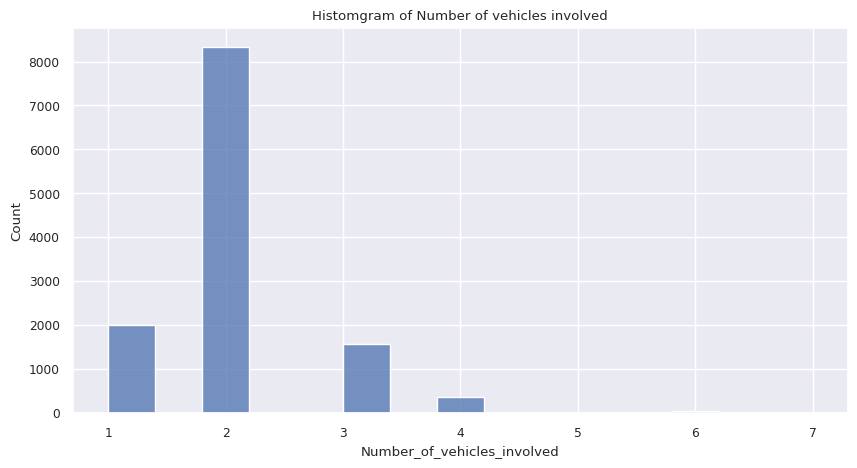

In [ ]:
# checking the distribution of 'Number_of_vehicles_involved'
plt.figure(figsize=(10,5))
sns.histplot(df['Number_of_vehicles_involved'])
plt.title('Histomgram of Number of vehicles involved')
plt.show()

- Number of vehicles involved ranges from 1 to 4 vehicles.
- Most of the accidents involved two vehicles.

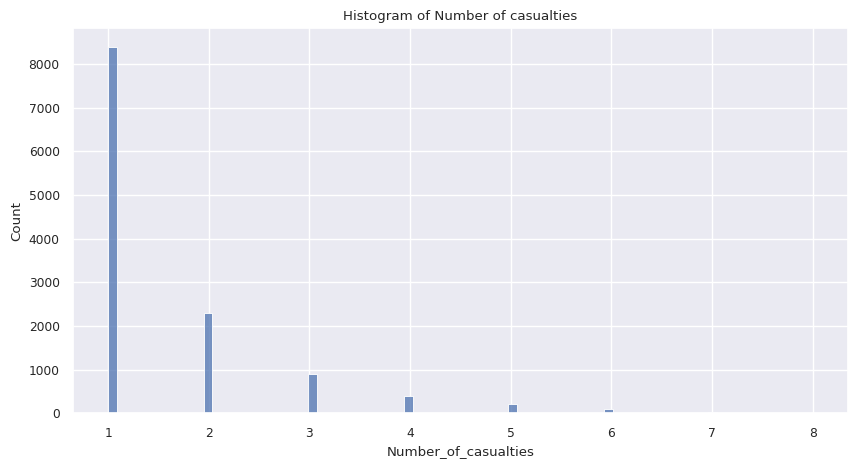

In [ ]:
# checking the distribution of 'Number_of_casualties'
plt.figure(figsize=(10,5))
sns.histplot(df['Number_of_casualties'])
plt.title('Histogram of Number of casualties')
plt.show()

- Number of casualties ranges from 1 to 8.
- Most of the time there is only one casualty followed by 2.

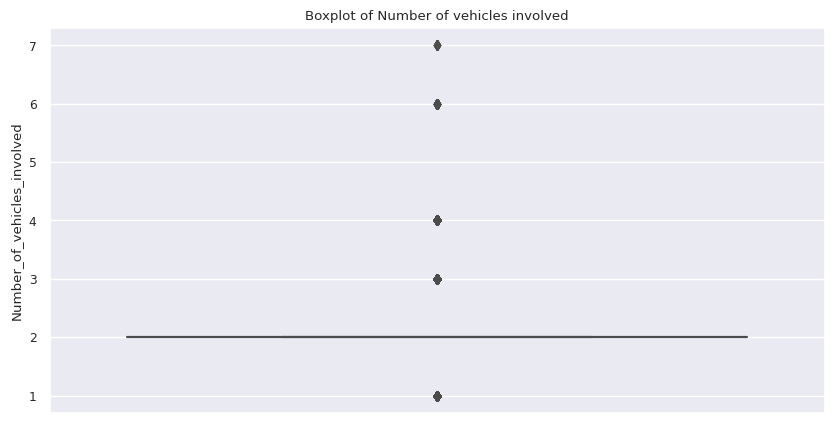

In [ ]:
# Boxplot of 'Number_of_vehicles_involved'
plt.figure(figsize=(10,5))
sns.boxplot(data = df, y = 'Number_of_vehicles_involved')
plt.title('Boxplot of Number of vehicles involved')
plt.show()

- Number of vehicles involved has outlies on both sides.

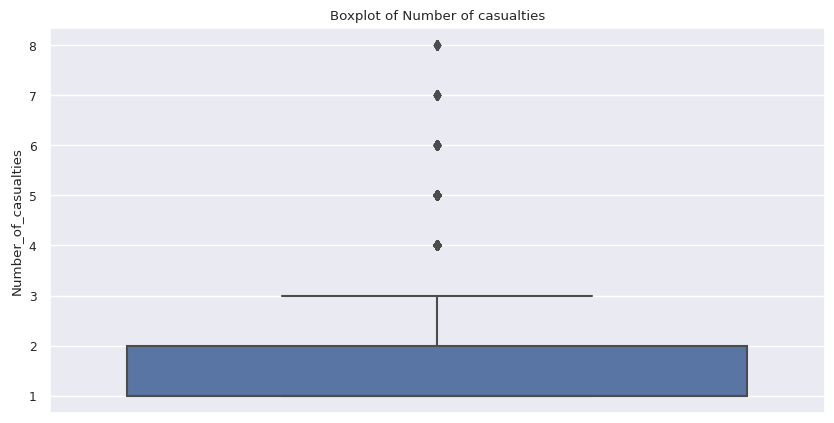

In [ ]:
# Boxplot of 'Number_of_casualties'
plt.figure(figsize=(10,5))
sns.boxplot(data=df, y='Number_of_casualties')
plt.title('Boxplot of Number of casualties')
plt.show()

- Number of casualties also has outliers in upper side.

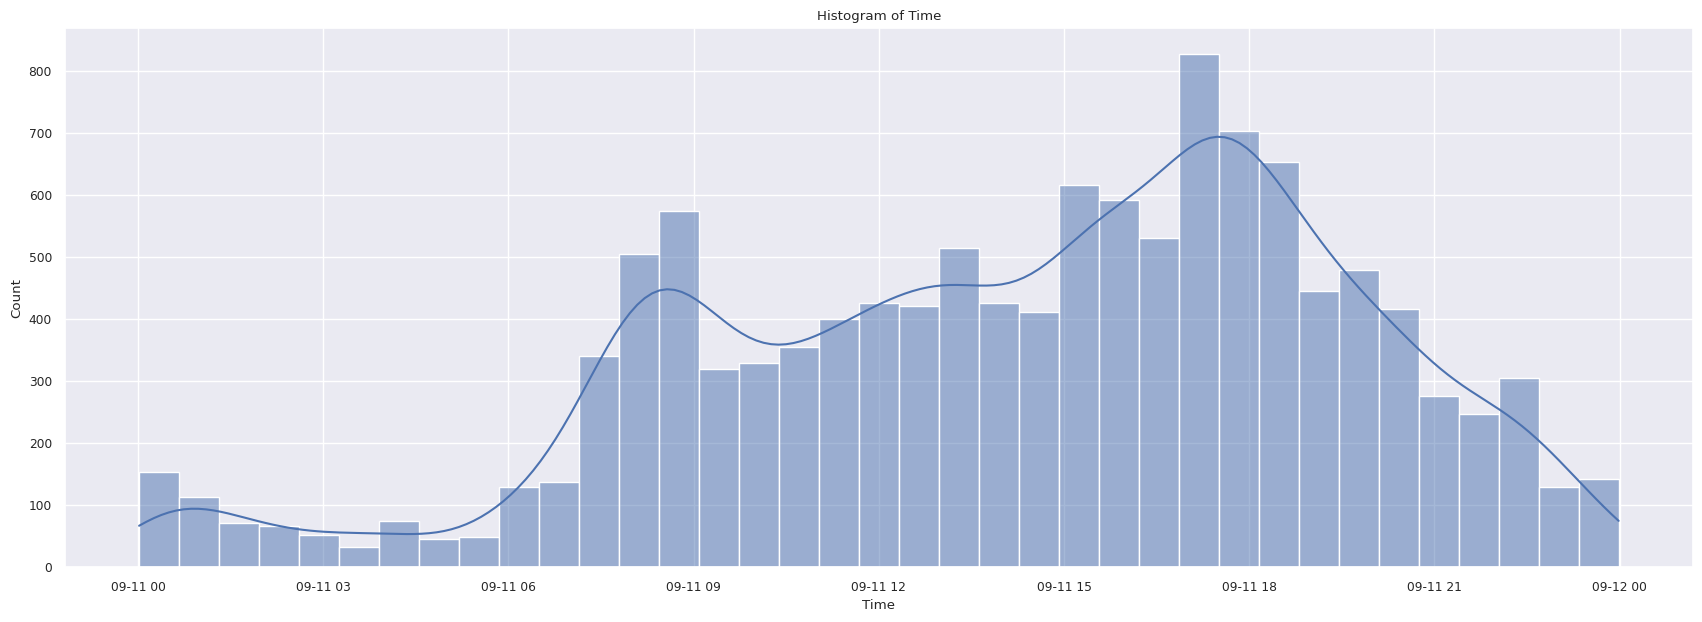

In [ ]:
# Checking the distribution of Time
plt.figure(figsize=(21,7))
sns.histplot(data=df, x='Time',kde = True);
plt.title('Histogram of Time')
plt.show()

- The distribution of Time is skewed towards left.
- Many acidents happend in peak time at morning 8 to 10 am and in afternoon 3 to 6 pm.

#### Distribution of categorical features

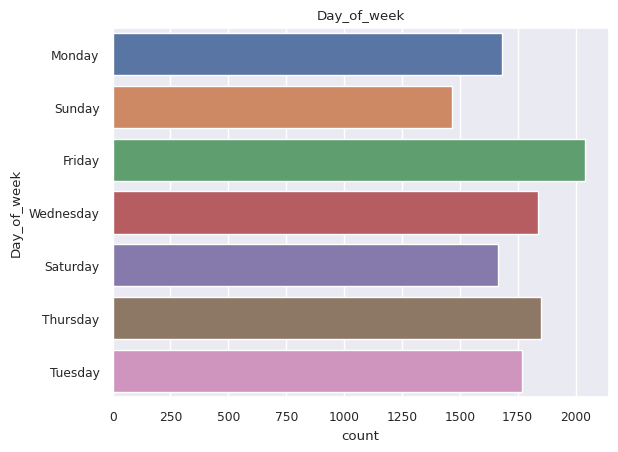

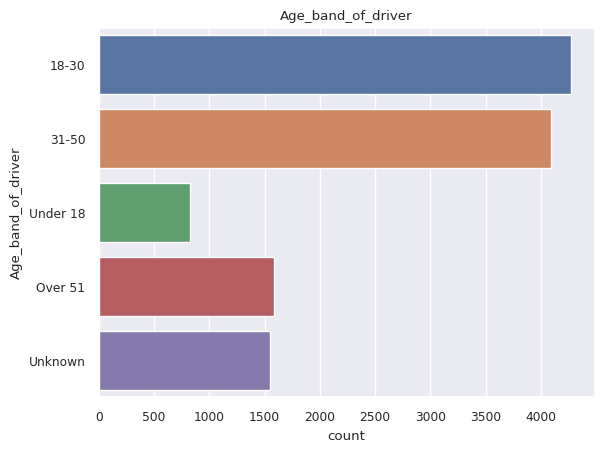

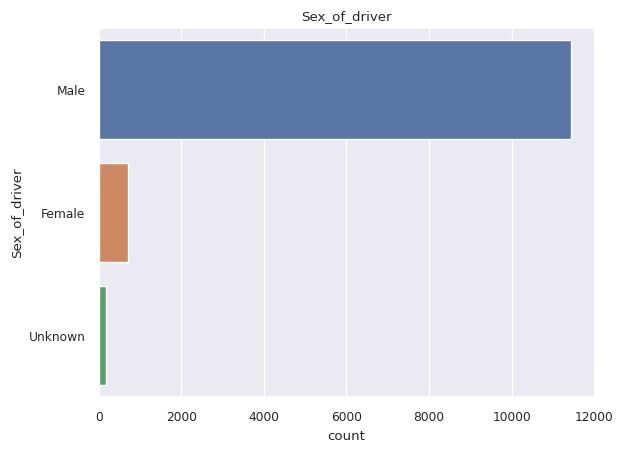

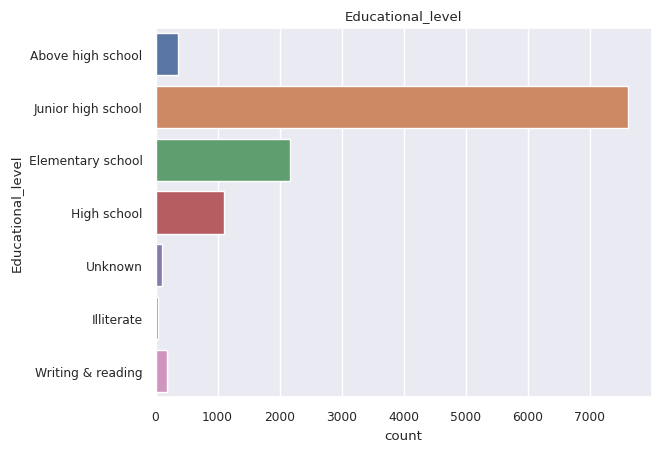

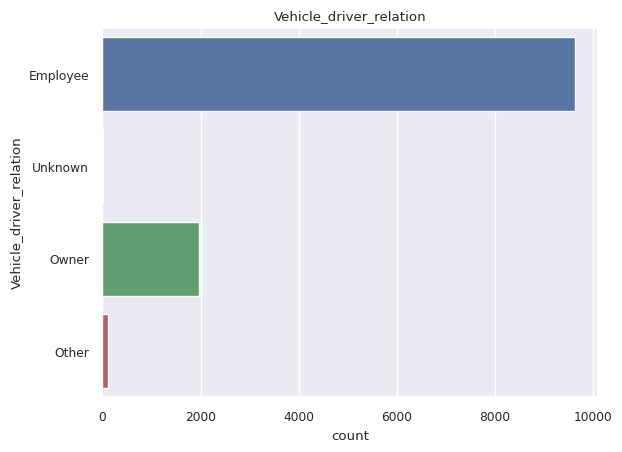

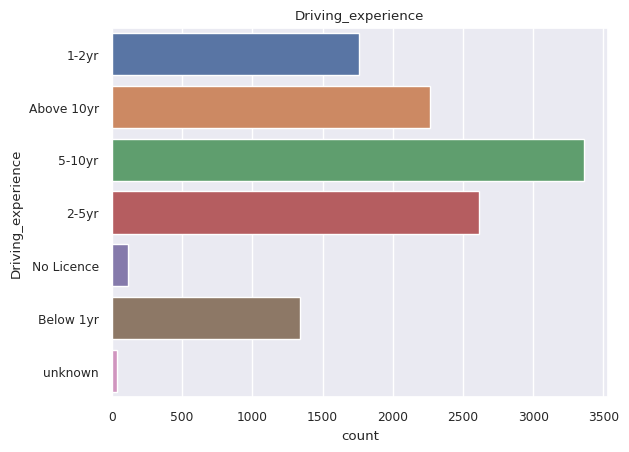

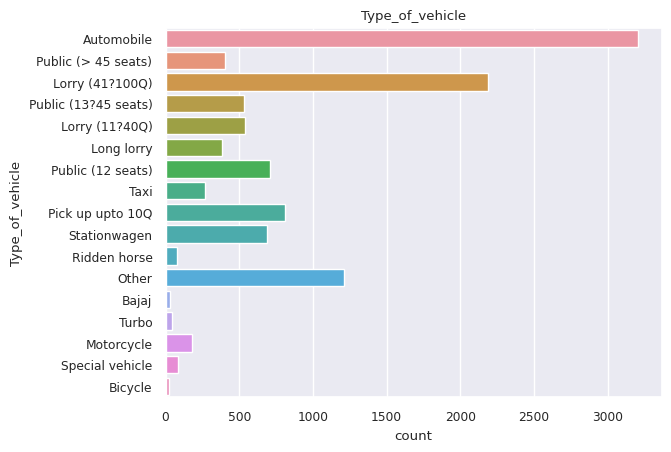

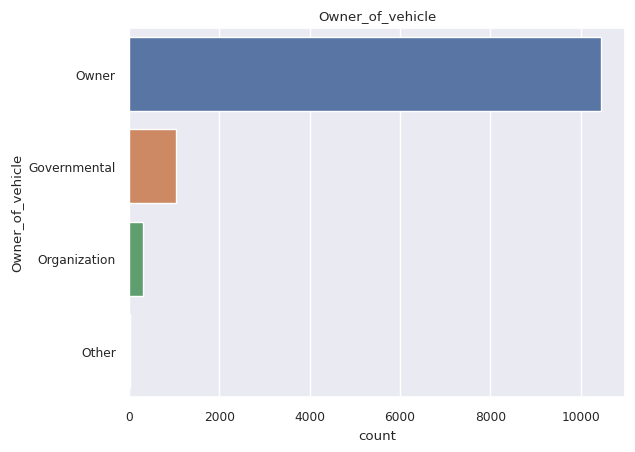

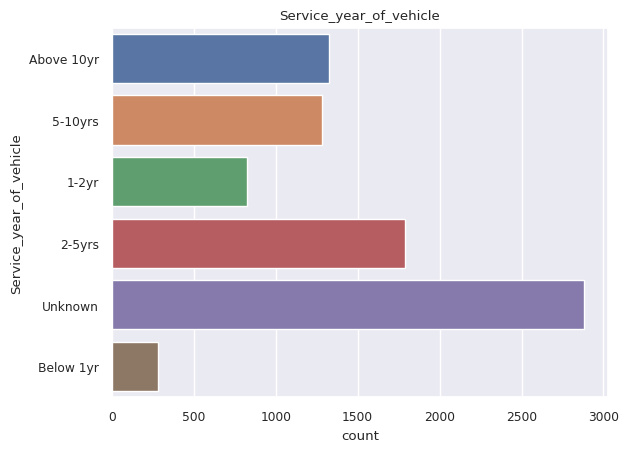

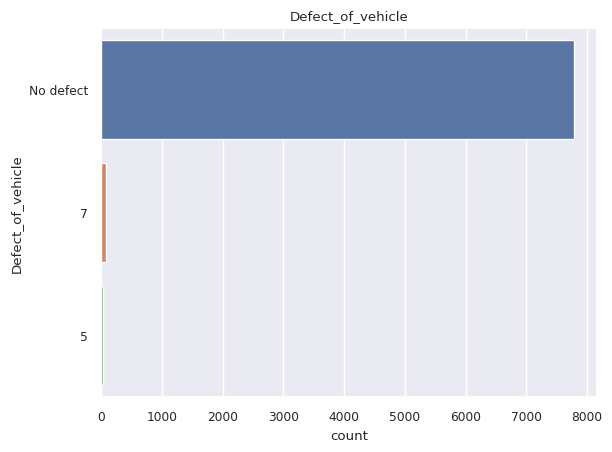

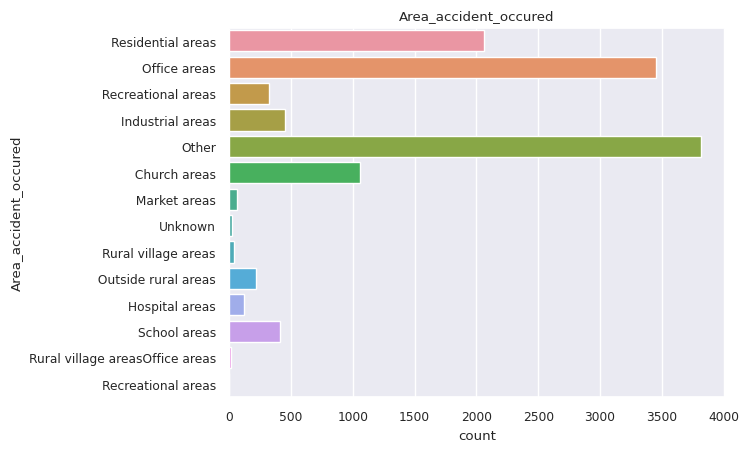

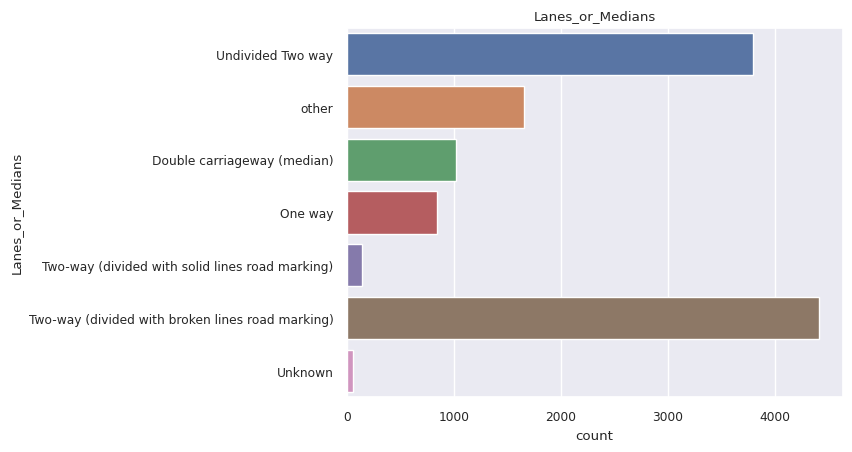

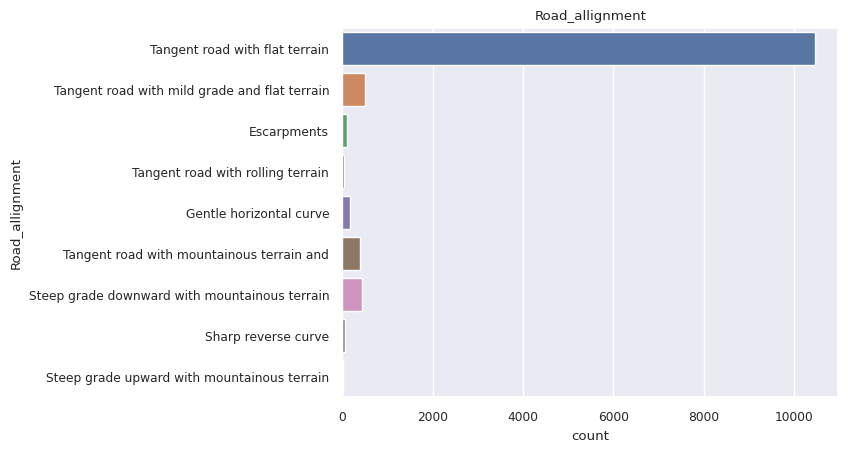

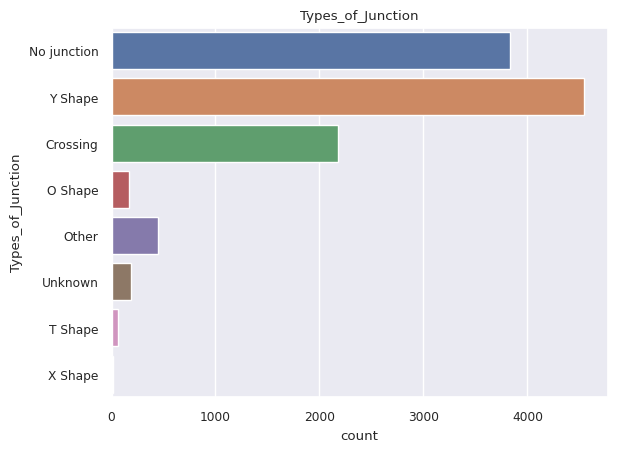

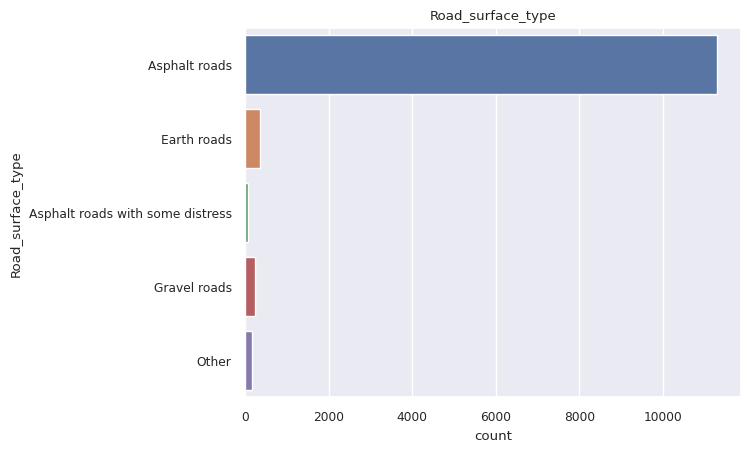

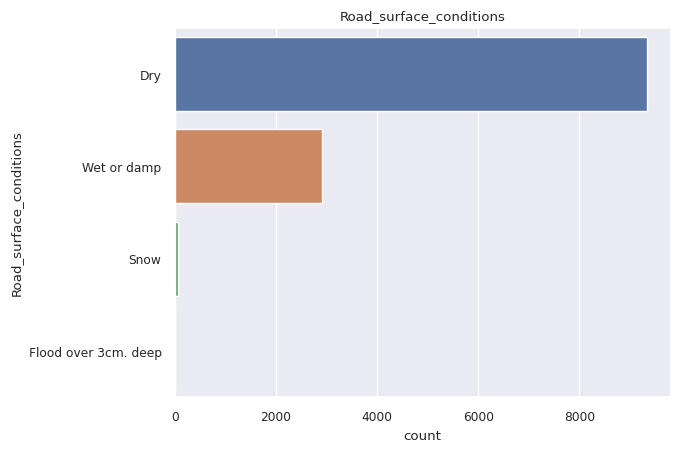

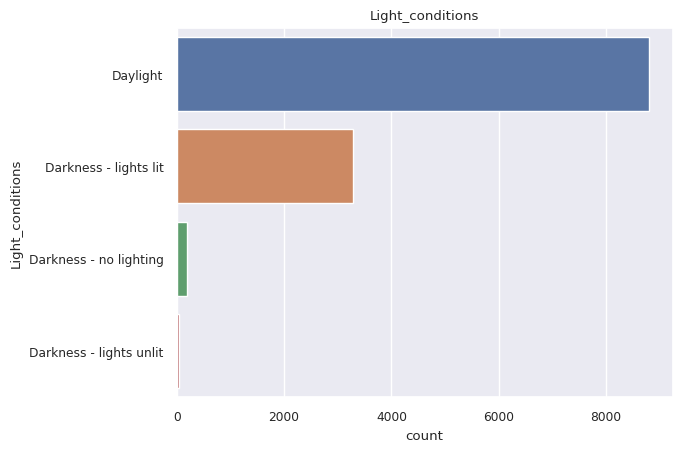

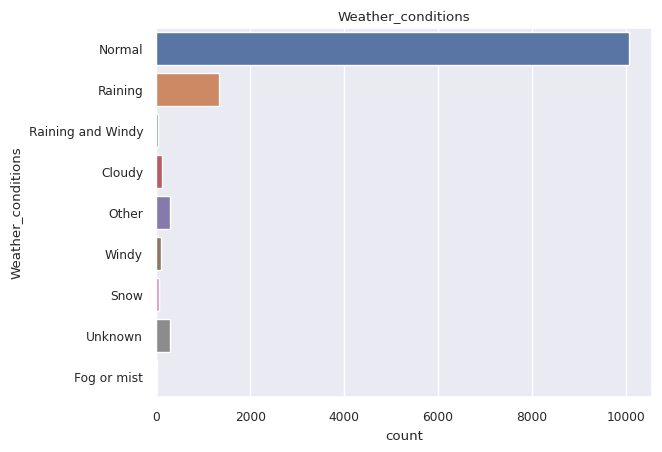

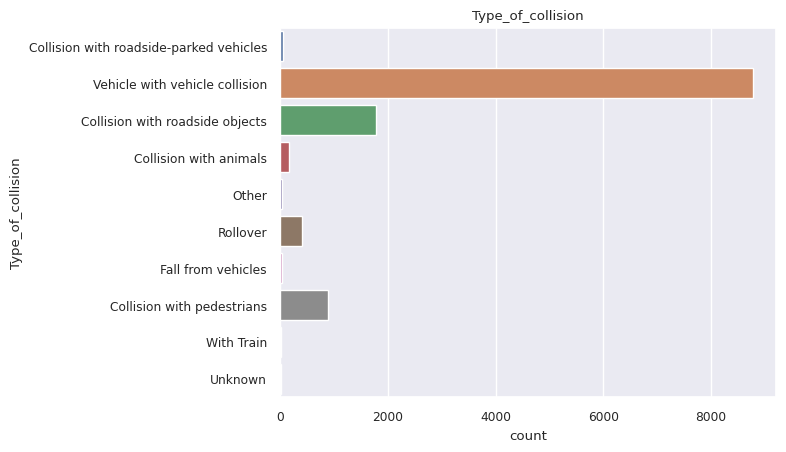

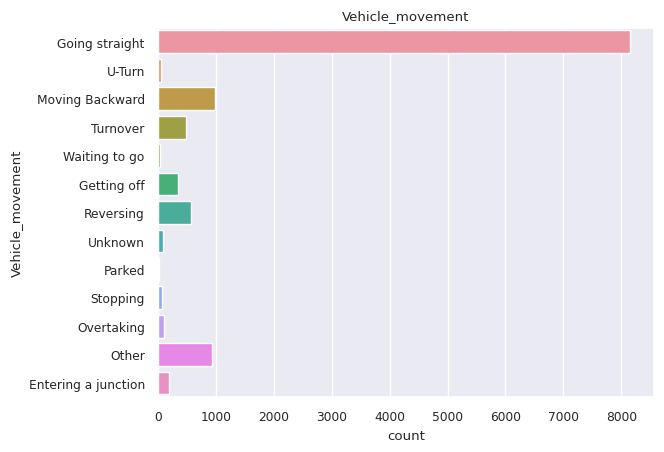

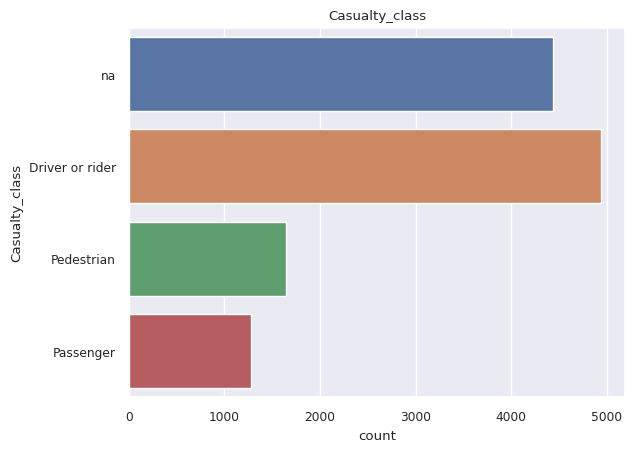

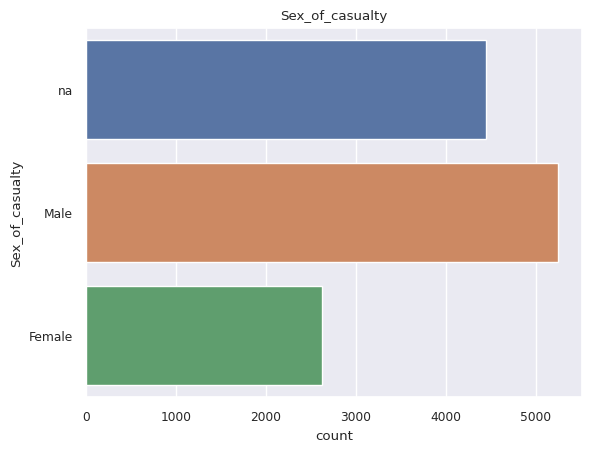

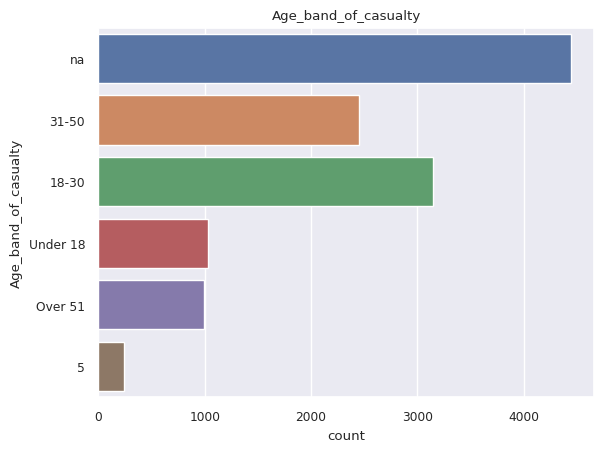

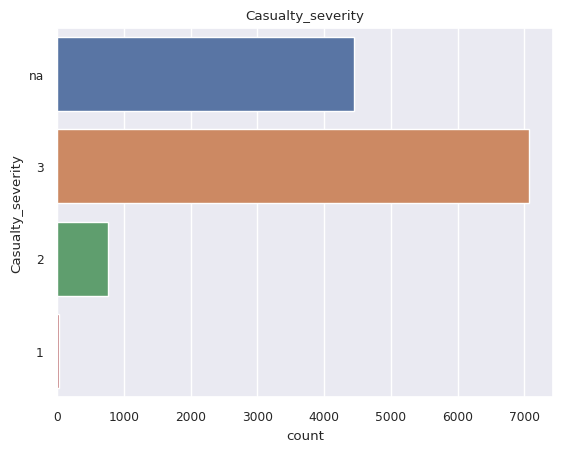

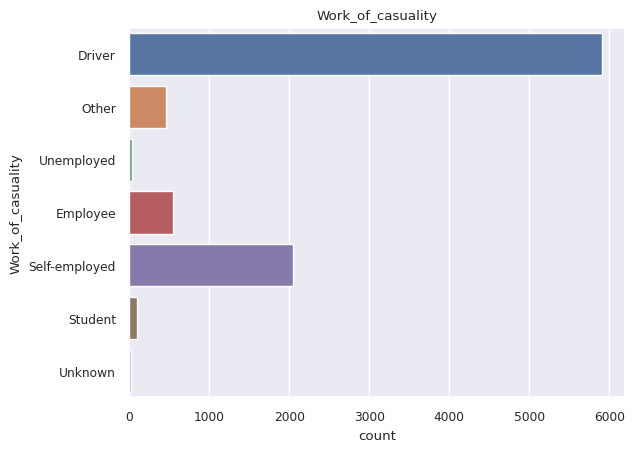

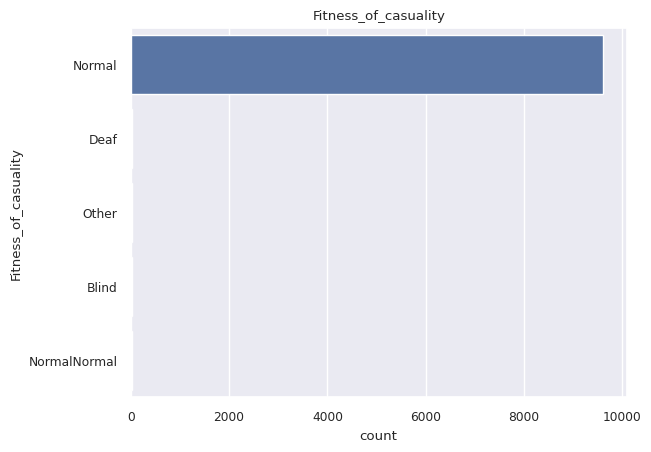

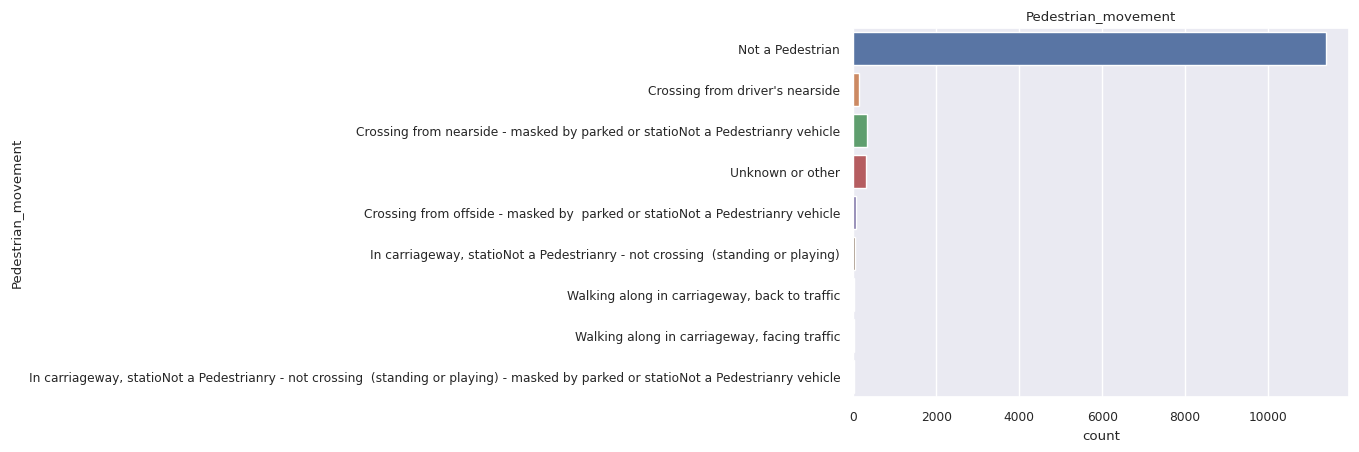

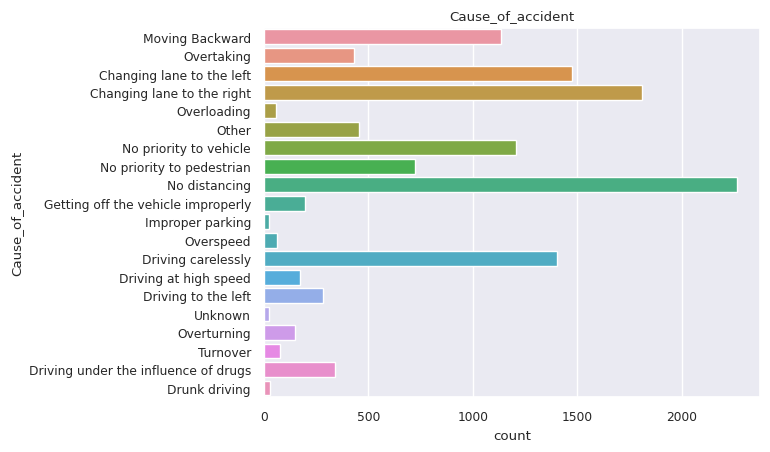

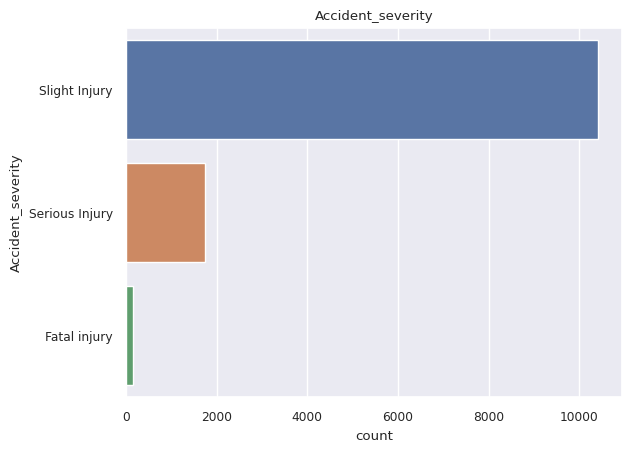

In [ ]:
for col in df.select_dtypes(include='object'):
    if df[col].nunique() <= 22:
        sns.countplot(y=col, data=df)
        plt.title(col)
        plt.show()

**Observations**
- More accidents happend in Friday
- Age of driver involved in accidents are between 18-50
- Most of the accidents are done of Male drivers
- Education level of drivers involved in accidents are mostly is Junior high school
- Most of the accidents are done by Employee not the owner of vehicle
- Person with about 5 to 10 years of driving experience tend to do accidents more.
- Automobile type of vehicle involved in accidents more
- Governmental and organization vehicles are not involved in accidents much, only individuals owning the vehicles are involved in accidents.
- Vehicle from 2 to 5 years of service tend to do more accidents.
- Most of vehicle involved in accidents do not have any defect.
- Office areas are most prone to accidents.
- Most accidents happend in Undived Two way, Tangent road with flat terrain, Y-shape junction, Asphalt roads, dry road surface conditions, in day light and normal conditions.
- Most of the collision are vehicle with vehicle collision with striaght vehicle movement.
- Most of the casualty class is Driver or Rider in specific Male driver between age of 18 to 30 years with casualty severity of 3. Most of them are Drivers as proffession. Their fitness level is Normal.
- Most of the accidents does not involve pedestrian.
- The primary cause of accident is not spacing the distance between the vehicle and while changing the lanes to right/left.
- Most of accidents has light severity.

### Multivariate Analysis

**Segment target by numerical features**

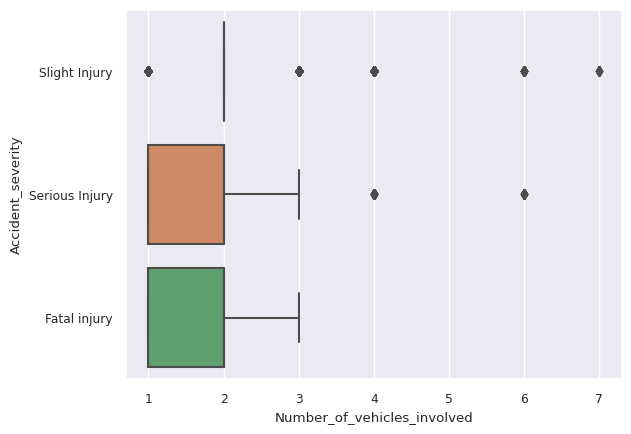

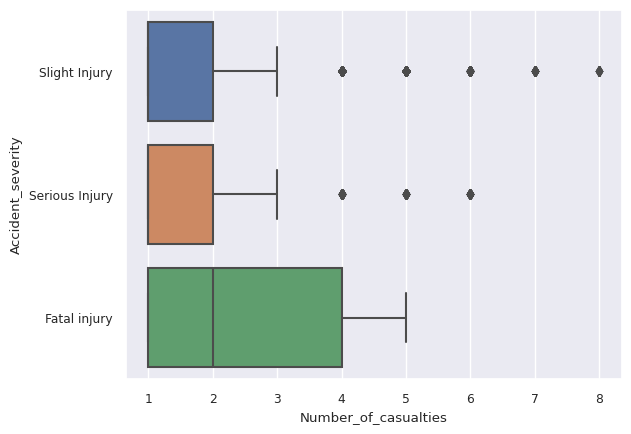

In [ ]:
num_cols = ['Number_of_vehicles_involved','Number_of_casualties']
for col in num_cols:
    sns.boxplot(y = df['Accident_severity'], x = col, data=df)
    plt.show()

- Most of the cases Serious and Fatal injuries happend with two vehicles involved in an accident.
- Most of the Fatal injuries happend to 4 casualties and Serious and Slight injuries happend to 2 casualties

**Target feature vs the other categorical features**

**Using crosstab to show tables of target vs categorical features**

In [ ]:
for col in df.select_dtypes(include='object'):
    if df[col].nunique() <=4:
        display(pd.crosstab(df['Accident_severity'], df[col], normalize='index'))

Sex_of_driver,Female,Male,Unknown
Accident_severity,,,
Fatal injury,0.031646,0.962025,0.006329
Serious Injury,0.059667,0.930006,0.010327
Slight Injury,0.056841,0.927892,0.015266


Vehicle_driver_relation,Employee,Other,Owner,Unknown
Accident_severity,,,,
Fatal injury,0.765101,0.006711,0.228188,0.000000
Serious Injury,0.817963,0.008439,0.172996,0.000603
Slight Injury,0.821432,0.010877,0.166381,0.001309


Owner_of_vehicle,Governmental,Organization,Other,Owner
Accident_severity,,,,
Fatal injury,0.104575,0.026144,0.000000,0.869281
Serious Injury,0.078349,0.022727,0.000598,0.898325
Slight Injury,0.089320,0.026976,0.002098,0.881607


Defect_of_vehicle,5,7,No defect
Accident_severity,,,
Fatal injury,0.000000,0.000000,1.000000
Serious Injury,0.005240,0.012227,0.982533
Slight Injury,0.004519,0.009339,0.986142


Road_surface_conditions,Dry,Flood over 3cm. deep,Snow,Wet or damp
Accident_severity,,,,
Fatal injury,0.765823,0.000000,0.000000,0.234177
Serious Injury,0.764200,0.000000,0.002295,0.233505
Slight Injury,0.757273,0.000192,0.006337,0.236198


Light_conditions,Darkness - lights lit,Darkness - lights unlit,Darkness - no lighting,Daylight
Accident_severity,,,,
Fatal injury,0.417722,0.000000,0.031646,0.550633
Serious Injury,0.266781,0.004016,0.028112,0.701090
Slight Injury,0.264522,0.003169,0.013250,0.719059


Casualty_class,Driver or rider,Passenger,Pedestrian,na
Accident_severity,,,,
Fatal injury,0.449367,0.075949,0.170886,0.303797
Serious Injury,0.412507,0.104418,0.130809,0.352266
Slight Injury,0.398848,0.104273,0.133845,0.363034


Sex_of_casualty,Female,Male,na
Accident_severity,,,
Fatal injury,0.183544,0.512658,0.303797
Serious Injury,0.207114,0.440620,0.352266
Slight Injury,0.214114,0.422852,0.363034


Casualty_severity,1,2,3,na
Accident_severity,,,,
Fatal injury,0.000000,0.063291,0.632911,0.303797
Serious Injury,0.001721,0.056225,0.589788,0.352266
Slight Injury,0.002208,0.063658,0.571099,0.363034


Accident_severity,Fatal injury,Serious Injury,Slight Injury
Accident_severity,,,
Fatal injury,1.0,0.0,0.0
Serious Injury,0.0,1.0,0.0
Slight Injury,0.0,0.0,1.0


**Target across categorical features**

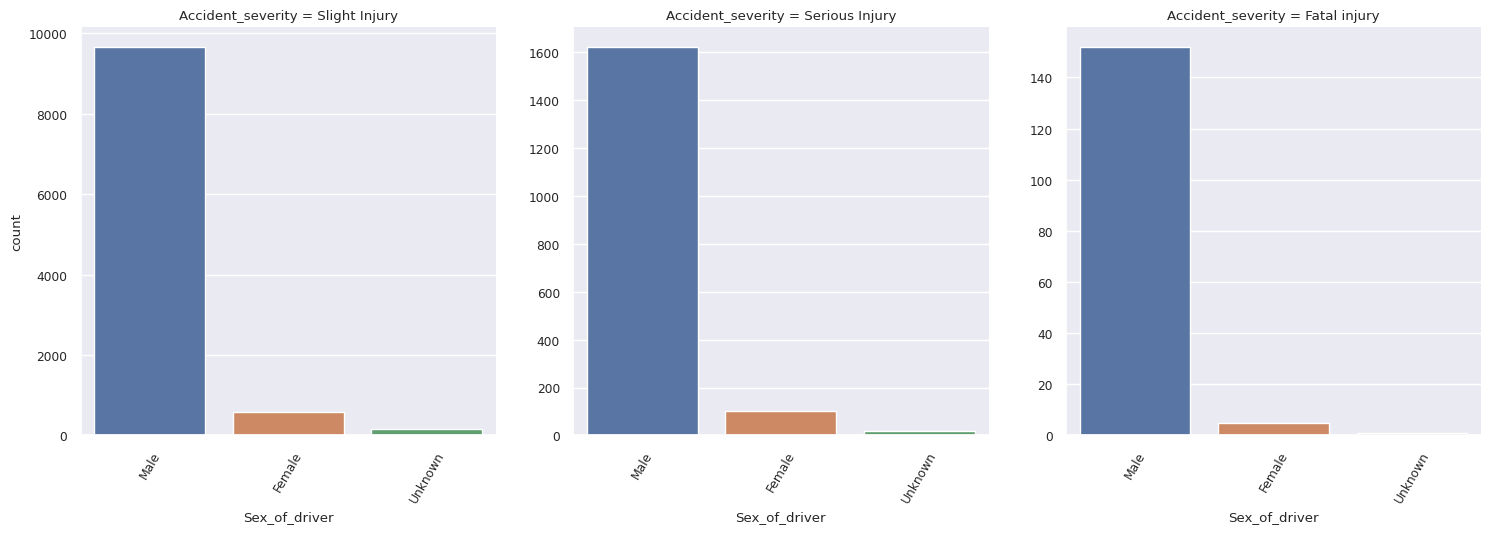

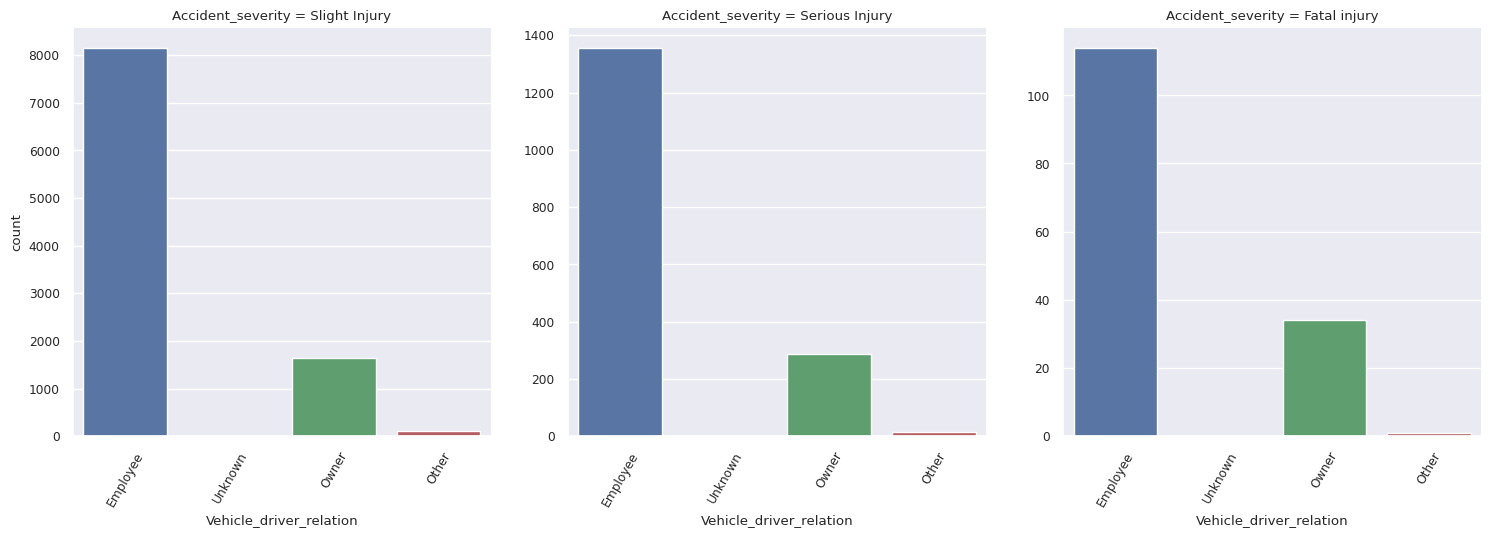

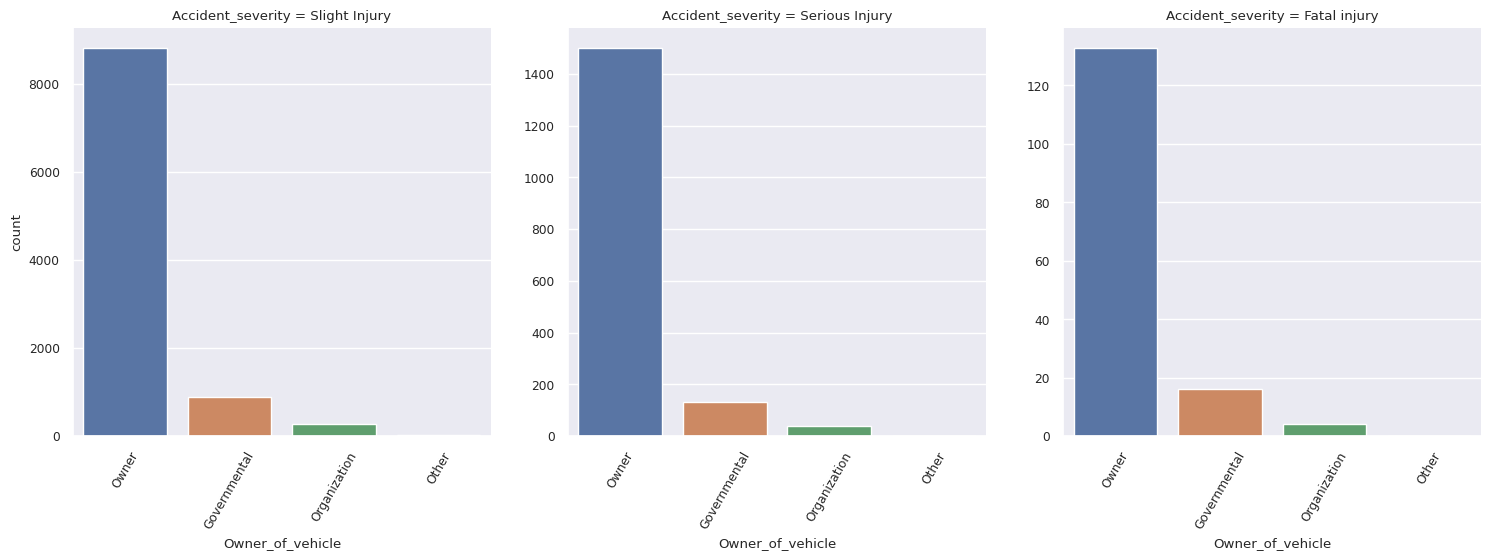

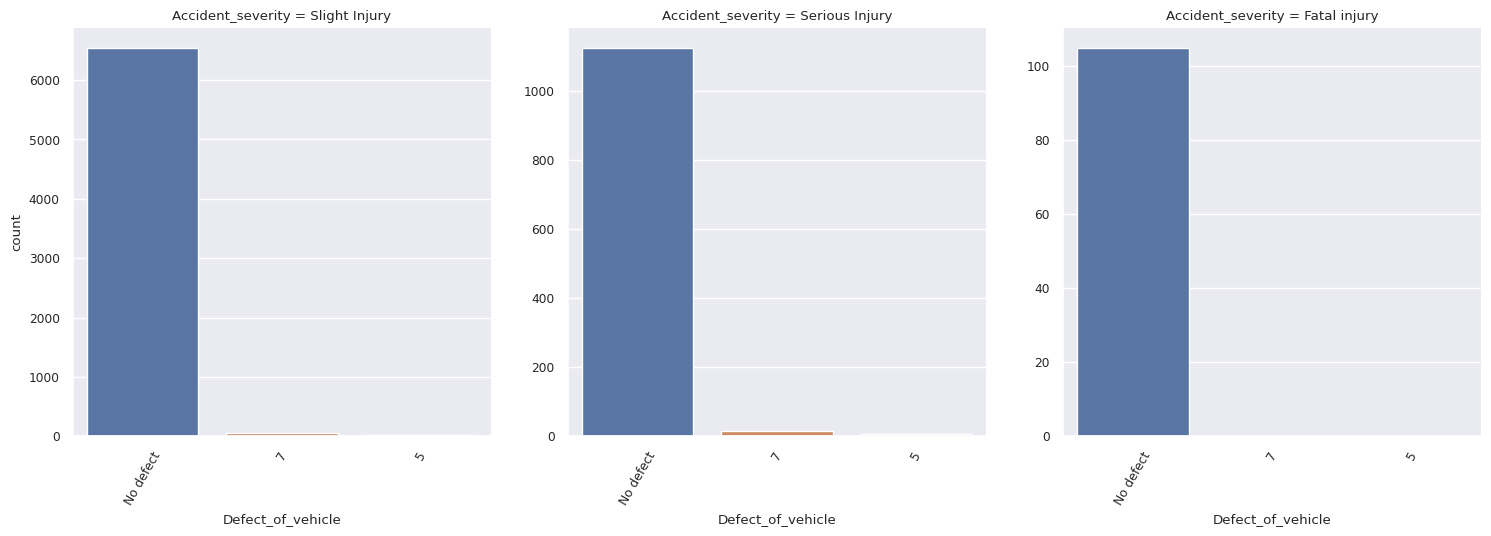

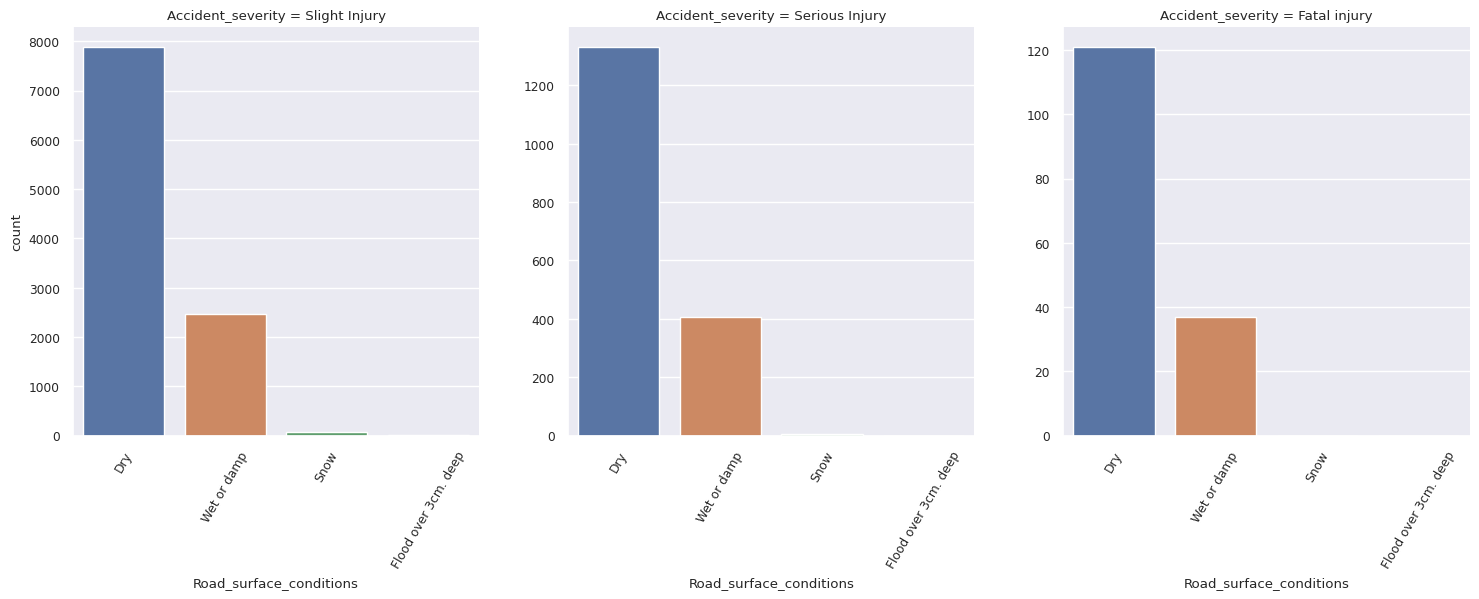

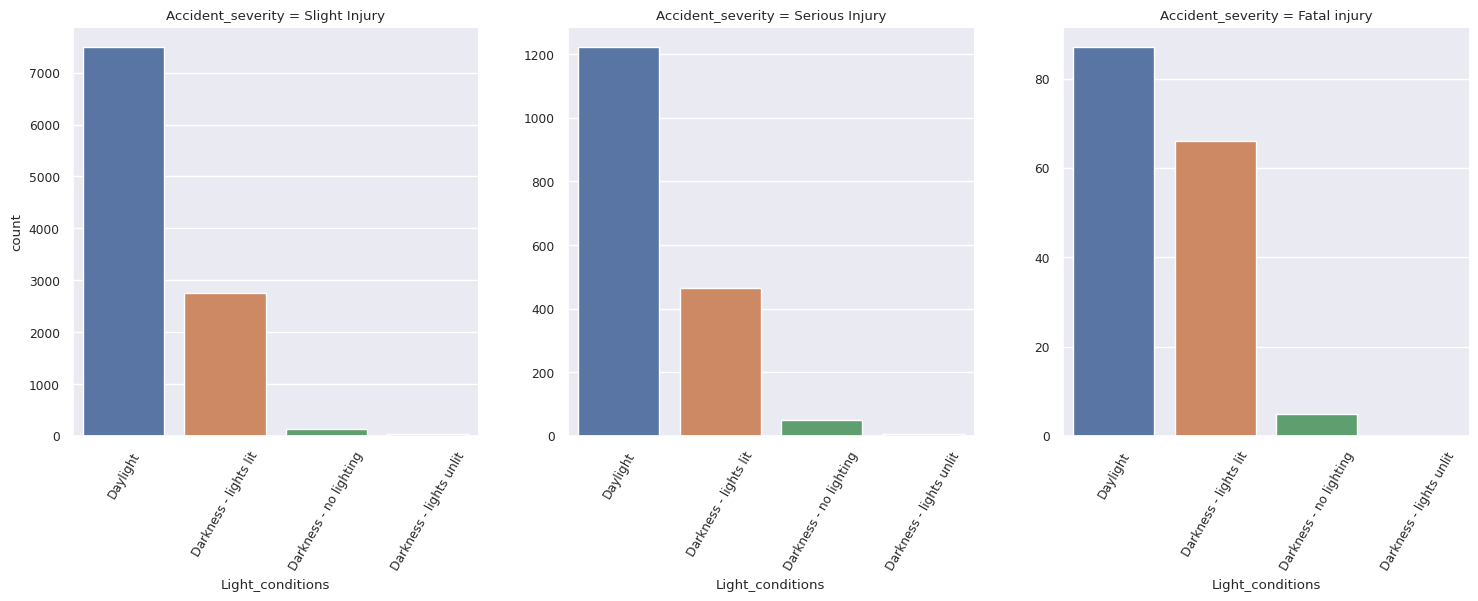

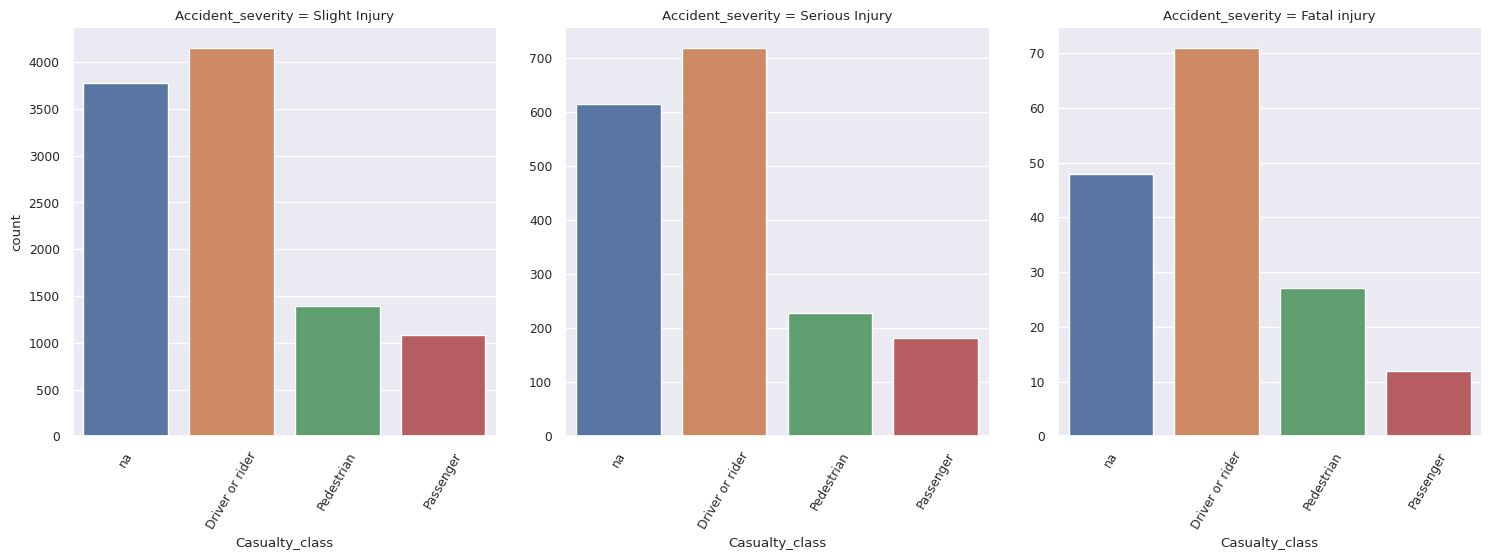

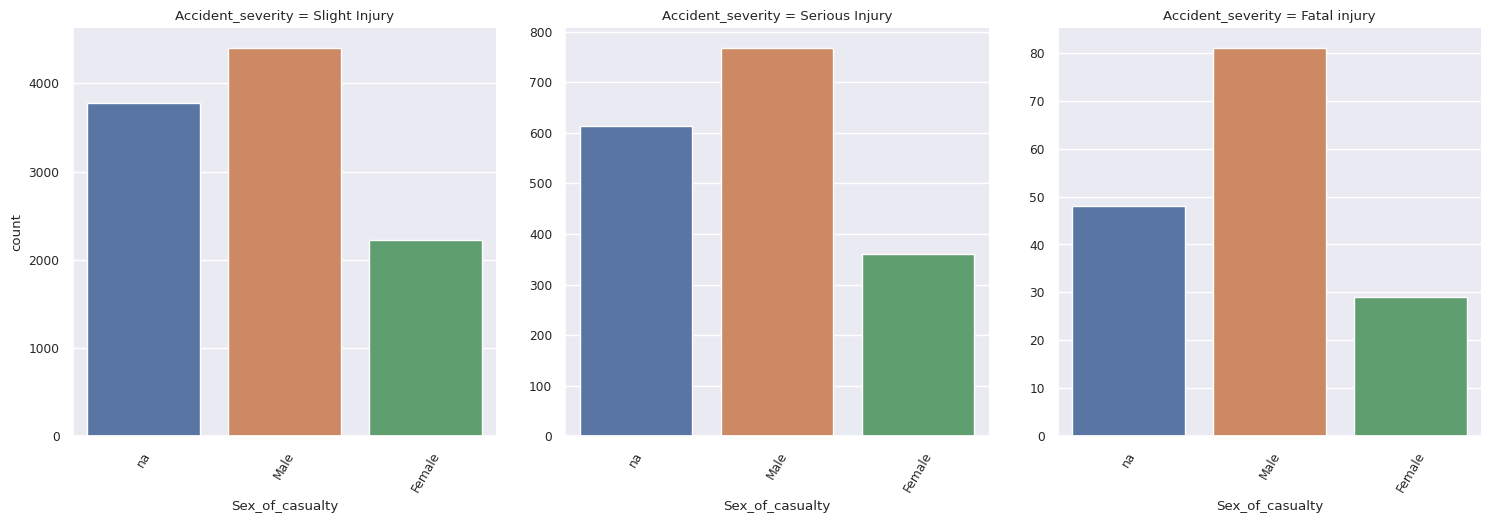

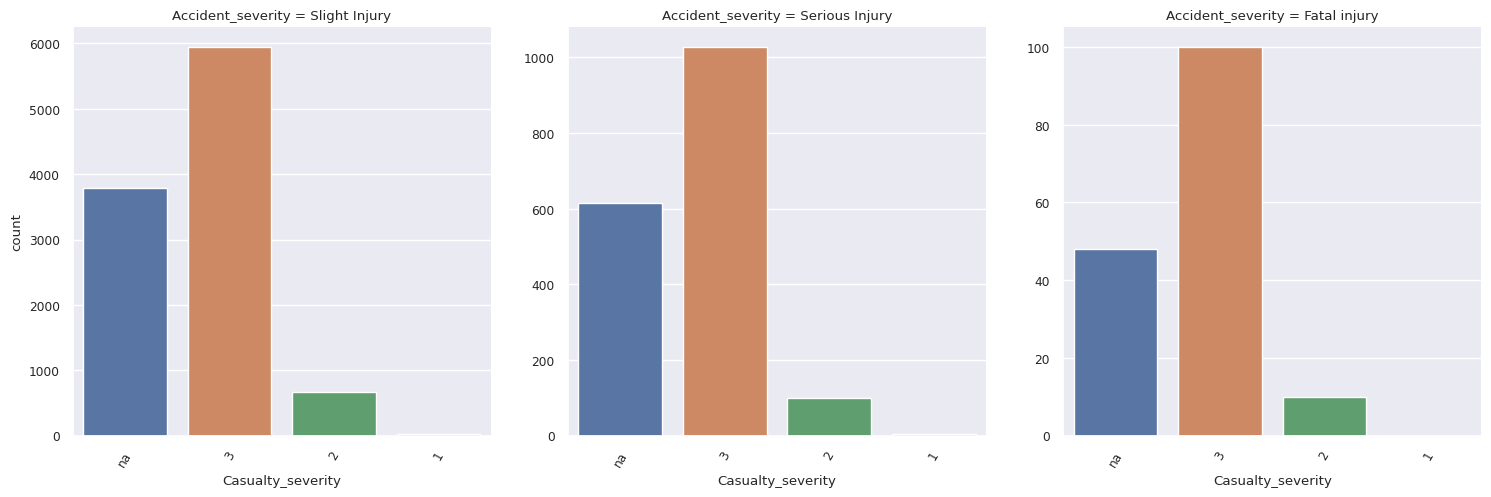

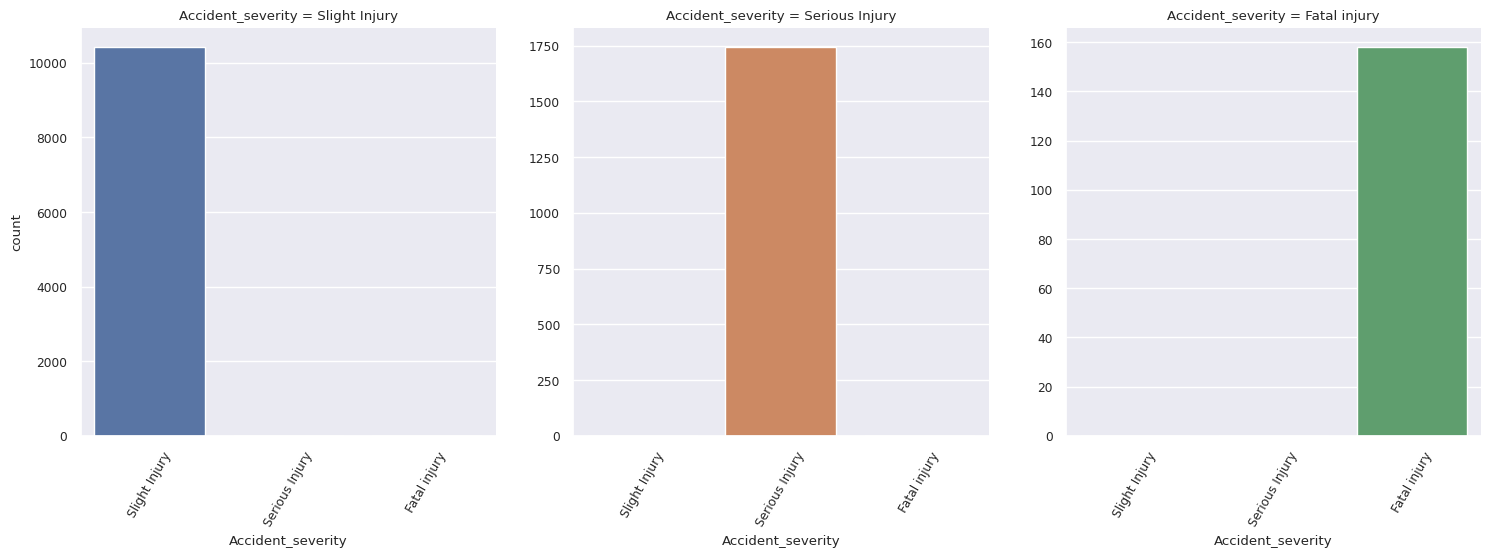

In [ ]:
for col in df.select_dtypes(include='object'):
    if df[col].nunique() <= 4:
        g = sns.catplot(x = col, kind='count', col = 'Accident_severity', data=df, sharey=False)
        g.set_xticklabels(rotation=60)

**All Categorical vs all numeric features**

In [ ]:
df.groupby('Accident_severity').mean()

,Number_of_vehicles_involved,Number_of_casualties
Accident_severity,,
Fatal injury,1.797468,2.341772
Serious Injury,1.895009,1.535284
Slight Injury,2.068747,1.538262


In [ ]:
for col in df.select_dtypes(include='object'):
    if df[col].nunique() <= 3:
        display(df.groupby(col)[['Number_of_vehicles_involved',  'Number_of_casualties']].mean());

,Number_of_vehicles_involved,Number_of_casualties
Sex_of_driver,,
Female,2.158345,1.312411
Male,2.034537,1.563172
Unknown,1.971910,1.511236


,Number_of_vehicles_involved,Number_of_casualties
Defect_of_vehicle,,
5,2.166667,1.555556
7,2.078947,1.460526
No defect,2.028289,1.547383


,Number_of_vehicles_involved,Number_of_casualties
Sex_of_casualty,,
Female,2.037405,1.533206
Male,2.035408,1.571102
na,2.048841,1.529822


,Number_of_vehicles_involved,Number_of_casualties
Accident_severity,,
Fatal injury,1.797468,2.341772
Serious Injury,1.895009,1.535284
Slight Injury,2.068747,1.538262


**Correlations**

In [ ]:
corr = df.corr()
corr

,Number_of_vehicles_involved,Number_of_casualties
Number_of_vehicles_involved,1.000000,0.213427
Number_of_casualties,0.213427,1.000000


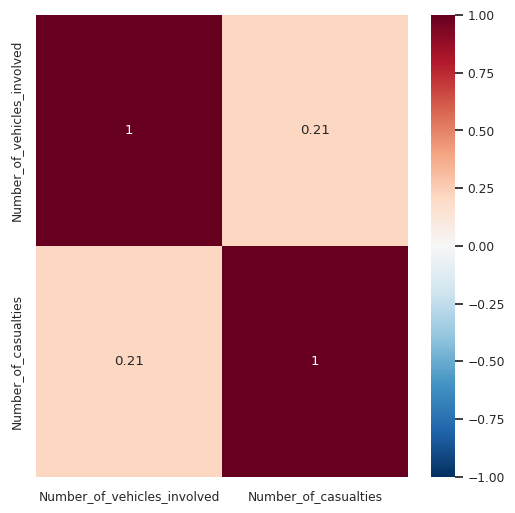

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(corr, cmap='RdBu_r', annot=True, vmax=1, vmin=-1)
plt.show()

- Correlation between Number of vechicles involve and Number of casualties is less.

# Insights from EDA
- There are 12316 observations in the dataset and 32 columns in this dataset in which only 2 columns are of integer data type (Number_of_vehicles_involved and Number_of_casualties) and others are of object data type.
- Accident_severity is the target variable for this problem statement.
- Number of vehicles involved ranges from 1 to 4 vehicles and most of the accidents involved two vehicles.
- Number of casualties ranges from 1 to 8 but most of the time there is only one casualty followed by 2.
- Number of vehicles and Number of casualties has outliers.
- Most of the accidents happend in peak time both morning and evening.
- More accidents happend in Friday.
- Age of driver involved in accidents are between 18-50.
- Most of the accidents are done of Male drivers.
- Junior high school students tend to do more accidents.
- Most of the accidents are done by Employee not the owner of vehicle.
- Person with about 5 to 10 years of driving experience tend to do accidents more than others.
- Automobile type of vehicle involved in accidents more than others.
- Governmental and organization vehicles are not involved in accidents much, only individuals owning the vehicles are involved in accidents.
- Vehicle from 2 to 5 years of service tend to do more accidents.
- Most of vehicle involved in accidents do not have any defect.
- Office areas are most prone to accidents.
- Most accidents happend in Undived Two way, Tangent road with flat terrain, Y-shape junction, Asphalt roads, dry road surface conditions, in day light and normal conditions.
- Most of the collision are vehicle with vehicle collision with striaght vehicle movement.
- Most of the casualty class is Driver or Rider in specific Male driver between age of 18 to 30 years with casualty severity of 3. Most of them are Drivers as proffession. Their fitness level is Normal.
- Most of the accidents does not involve pedestrian.
- The primary cause of accident is not leaving enough space between the vehicles and while changing the lanes to right/left.
- Most of accidents have light severity.


**From the data overview, we see that many columns in the data need to be preprocessed before they can be used for analysis.**

# Data Preprocessing


- Missing value treatment
- Outliers detection and Treatment
- Encoding techniques  
- Imbalanced data treatment using SMOTE


## Missing Value Treatment

In [ ]:
from sklearn import preprocessing
import missingno as msno

**Checking the values of each category in Target variable**

In [ ]:
df['Accident_severity'].value_counts()

Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: Accident_severity, dtype: int64

In [ ]:
df['Accident_severity'].value_counts(normalize=True)

Slight Injury     0.845648
Serious Injury    0.141523
Fatal injury      0.012829
Name: Accident_severity, dtype: float64

- Almost ~85% of the Accident severity has slight Injury and 14% of Serious Injury.
- Very less people got Fatal injury.

**Detecting missing values of the data**

In [ ]:
missing_count = df.isnull().sum().sort_values(ascending=False)
missing_count

Defect_of_vehicle              4427
Service_year_of_vehicle        3928
Work_of_casuality              3198
Fitness_of_casuality           2635
Type_of_vehicle                 950
Types_of_Junction               887
Driving_experience              829
Educational_level               741
Vehicle_driver_relation         579
Owner_of_vehicle                482
Lanes_or_Medians                385
Vehicle_movement                308
Area_accident_occured           239
Road_surface_type               172
Type_of_collision               155
Road_allignment                 142
Casualty_class                    0
Pedestrian_movement               0
Cause_of_accident                 0
Casualty_severity                 0
Age_band_of_casualty              0
Sex_of_casualty                   0
Time                              0
Road_surface_conditions           0
Number_of_casualties              0
Number_of_vehicles_involved       0
Weather_conditions                0
Light_conditions            

In [ ]:
missing_percent = (df.isnull().sum() * 100 / df.shape[0]).sort_values(ascending=False)
missing_percent

Defect_of_vehicle              35.945112
Service_year_of_vehicle        31.893472
Work_of_casuality              25.966223
Fitness_of_casuality           21.394933
Type_of_vehicle                 7.713543
Types_of_Junction               7.202014
Driving_experience              6.731082
Educational_level               6.016564
Vehicle_driver_relation         4.701202
Owner_of_vehicle                3.913608
Lanes_or_Medians                3.126015
Vehicle_movement                2.500812
Area_accident_occured           1.940565
Road_surface_type               1.396557
Type_of_collision               1.258525
Road_allignment                 1.152972
Casualty_class                  0.000000
Pedestrian_movement             0.000000
Cause_of_accident               0.000000
Casualty_severity               0.000000
Age_band_of_casualty            0.000000
Sex_of_casualty                 0.000000
Time                            0.000000
Road_surface_conditions         0.000000
Number_of_casual

In [ ]:
missing_values_table = pd.concat([missing_count, missing_percent], axis=1)

In [ ]:
missing_values_table = missing_values_table.rename(columns = {0 : 'Missing Values',  1 : 'Percentage'})

In [ ]:
missing_values_table

,Missing Values,Percentage
Defect_of_vehicle,4427,35.945112
Service_year_of_vehicle,3928,31.893472
Work_of_casuality,3198,25.966223
Fitness_of_casuality,2635,21.394933
Type_of_vehicle,950,7.713543
Types_of_Junction,887,7.202014
Driving_experience,829,6.731082
Educational_level,741,6.016564
Vehicle_driver_relation,579,4.701202
Owner_of_vehicle,482,3.913608


- These are the top 4 columns which has more missing values : Defect_of_vehicle with 35%, Service_year_of_vehicle with 31%, Work_of_casuality with 25% and Fitness_of_casuality with 21% of the dataset.
- There is no missing values in our target variable 'Accident_severity'.
- All features with missing values are of object data type. 'Mode' of the column should be used for imputing missing values to those columns.
- We can drop missing values with less than 10% of the data.
- We cam Impute values for Defect_of_vehicle, Service_year_of_vehicle, Work_of_casuality and Fitness_of_casuality.

### Treating Missing Values

In [ ]:
# Make a copy of df for data preprocessing
df1 = df.copy()

In [ ]:
# Creating a list of columns which has less than 1000 missing values
dropna_col = []
for col in df1.columns:
  if df1[col].isnull().sum() > 0 and df1[col].isnull().sum() < 1000 :
    dropna_col.append(col)
dropna_col

['Educational_level',
 'Vehicle_driver_relation',
 'Driving_experience',
 'Type_of_vehicle',
 'Owner_of_vehicle',
 'Area_accident_occured',
 'Lanes_or_Medians',
 'Road_allignment',
 'Types_of_Junction',
 'Road_surface_type',
 'Type_of_collision',
 'Vehicle_movement']

In [ ]:
df1.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [ ]:
# dropping the missing values
df1 = df1.dropna(subset = dropna_col)

In [ ]:
df1.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level                 0
Vehicle_driver_relation           0
Driving_experience                0
Type_of_vehicle                   0
Owner_of_vehicle                  0
Service_year_of_vehicle        2452
Defect_of_vehicle              2780
Area_accident_occured             0
Lanes_or_Medians                  0
Road_allignment                   0
Types_of_Junction                 0
Road_surface_type                 0
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision                 0
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                  0
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [ ]:
df1['Service_year_of_vehicle'].value_counts()

Unknown       2012
2-5yrs        1313
Above 10yr     951
5-10yrs        947
1-2yr          565
Below 1yr      199
Name: Service_year_of_vehicle, dtype: int64

In [ ]:
for col in df1.columns:
  if df1[col].isnull().sum() > 0:
    print('Value counts of ',col, '\n', df1[col].value_counts())
    print('*' *25)
    print('Mode of the ',col, '\n', df1[col].mode()[0])
    print('-' *50)

Value counts of  Service_year_of_vehicle 
 Unknown       2012
2-5yrs        1313
Above 10yr     951
5-10yrs        947
1-2yr          565
Below 1yr      199
Name: Service_year_of_vehicle, dtype: int64
*************************
Mode of the  Service_year_of_vehicle 
 Unknown
--------------------------------------------------
Value counts of  Defect_of_vehicle 
 No defect    5591
7              47
5              21
Name: Defect_of_vehicle, dtype: int64
*************************
Mode of the  Defect_of_vehicle 
 No defect
--------------------------------------------------
Value counts of  Work_of_casuality 
 Driver           4030
Self-employed    1386
Employee          393
Other             335
Student            73
Unemployed         21
Unknown            13
Name: Work_of_casuality, dtype: int64
*************************
Mode of the  Work_of_casuality 
 Driver
--------------------------------------------------
Value counts of  Fitness_of_casuality 
 Normal          6586
Blind             1

In [ ]:
df1.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level                 0
Vehicle_driver_relation           0
Driving_experience                0
Type_of_vehicle                   0
Owner_of_vehicle                  0
Service_year_of_vehicle        2452
Defect_of_vehicle              2780
Area_accident_occured             0
Lanes_or_Medians                  0
Road_allignment                   0
Types_of_Junction                 0
Road_surface_type                 0
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision                 0
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                  0
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

**Replace NAN value with most occurred category in the actual column.**

In [ ]:
for col in df1.columns:
  if df1[col].isnull().sum() > 0:
    df1[col] = df1[col].fillna(df1[col].mode()[0])

In [ ]:
df1.isnull().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Defect_of_vehicle              0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Work_of_casuality              0
Fitness_of_casuality           0
Pedestrian_movement            0
Cause_of_a

In [ ]:
df1.shape

(8439, 32)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8439 entries, 1 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Time                         8439 non-null   datetime64[ns]
 1   Day_of_week                  8439 non-null   object        
 2   Age_band_of_driver           8439 non-null   object        
 3   Sex_of_driver                8439 non-null   object        
 4   Educational_level            8439 non-null   object        
 5   Vehicle_driver_relation      8439 non-null   object        
 6   Driving_experience           8439 non-null   object        
 7   Type_of_vehicle              8439 non-null   object        
 8   Owner_of_vehicle             8439 non-null   object        
 9   Service_year_of_vehicle      8439 non-null   object        
 10  Defect_of_vehicle            8439 non-null   object        
 11  Area_accident_occured        8439 non-null

- After missing value treatment, we have 8439 records.

**Creating Hour Column from Time column**

In [ ]:
df1['Hour'] = df1.Time.dt.hour
df1.Hour

1        17
3         1
7        17
8        17
9        17
         ..
12309     9
12312    18
12313    13
12314    13
12315    13
Name: Hour, Length: 8439, dtype: int64

In [ ]:
df1.shape

(8439, 33)

**Deleting Time column**

In [ ]:
df1.drop(columns=['Time'], inplace=True)

In [ ]:
df1.shape

(8439, 32)

## Outliers detection using boxplot

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8439 entries, 1 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Day_of_week                  8439 non-null   object
 1   Age_band_of_driver           8439 non-null   object
 2   Sex_of_driver                8439 non-null   object
 3   Educational_level            8439 non-null   object
 4   Vehicle_driver_relation      8439 non-null   object
 5   Driving_experience           8439 non-null   object
 6   Type_of_vehicle              8439 non-null   object
 7   Owner_of_vehicle             8439 non-null   object
 8   Service_year_of_vehicle      8439 non-null   object
 9   Defect_of_vehicle            8439 non-null   object
 10  Area_accident_occured        8439 non-null   object
 11  Lanes_or_Medians             8439 non-null   object
 12  Road_allignment              8439 non-null   object
 13  Types_of_Junction            843

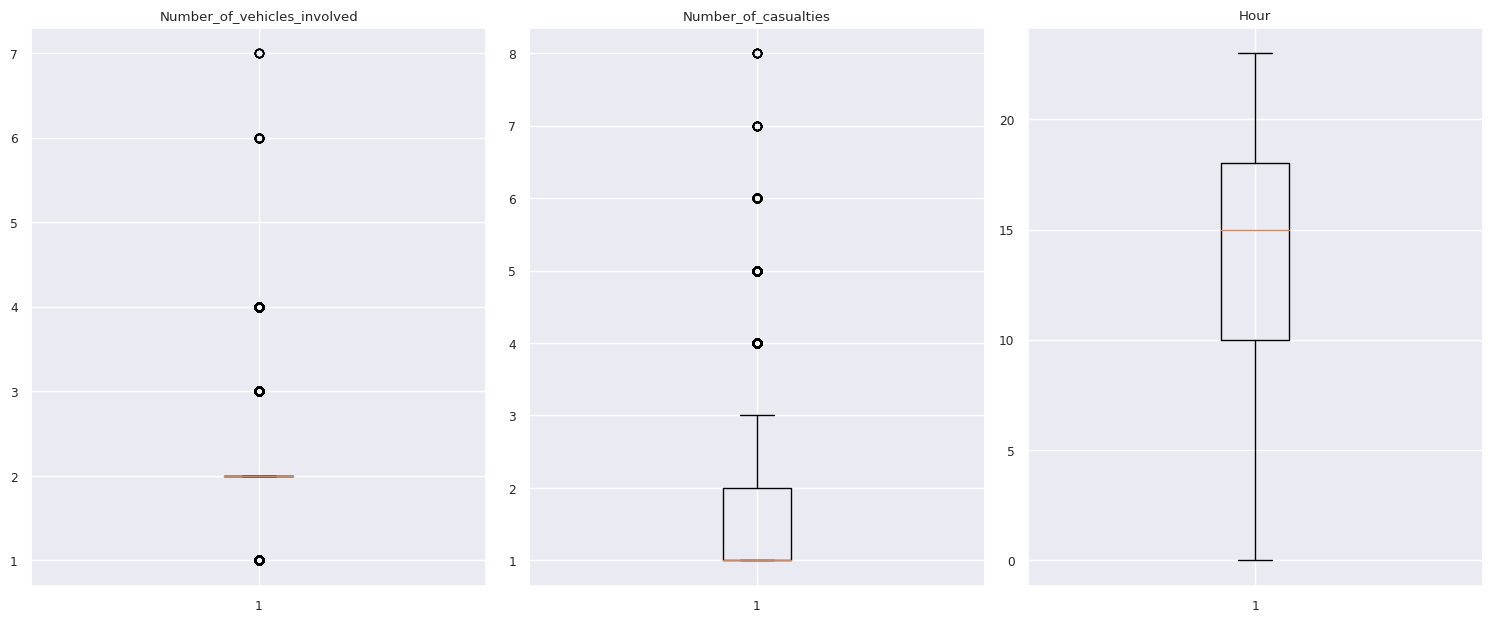

In [ ]:
import matplotlib.pyplot as plt
numerical_col = ["Number_of_vehicles_involved", "Number_of_casualties", "Hour"]
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- Outliers are seen in 'Number of vehicles involved' and 'Number of casualties' involved columns

### Treating Outliers
- Treating outliers in  'Number of vehicles involved' and 'Number of casualties' involved columns.

In [ ]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [ ]:
outlier_cols = ["Number_of_vehicles_involved", "Number_of_casualties"]
df1 = treat_outliers_all(df1, outlier_cols)

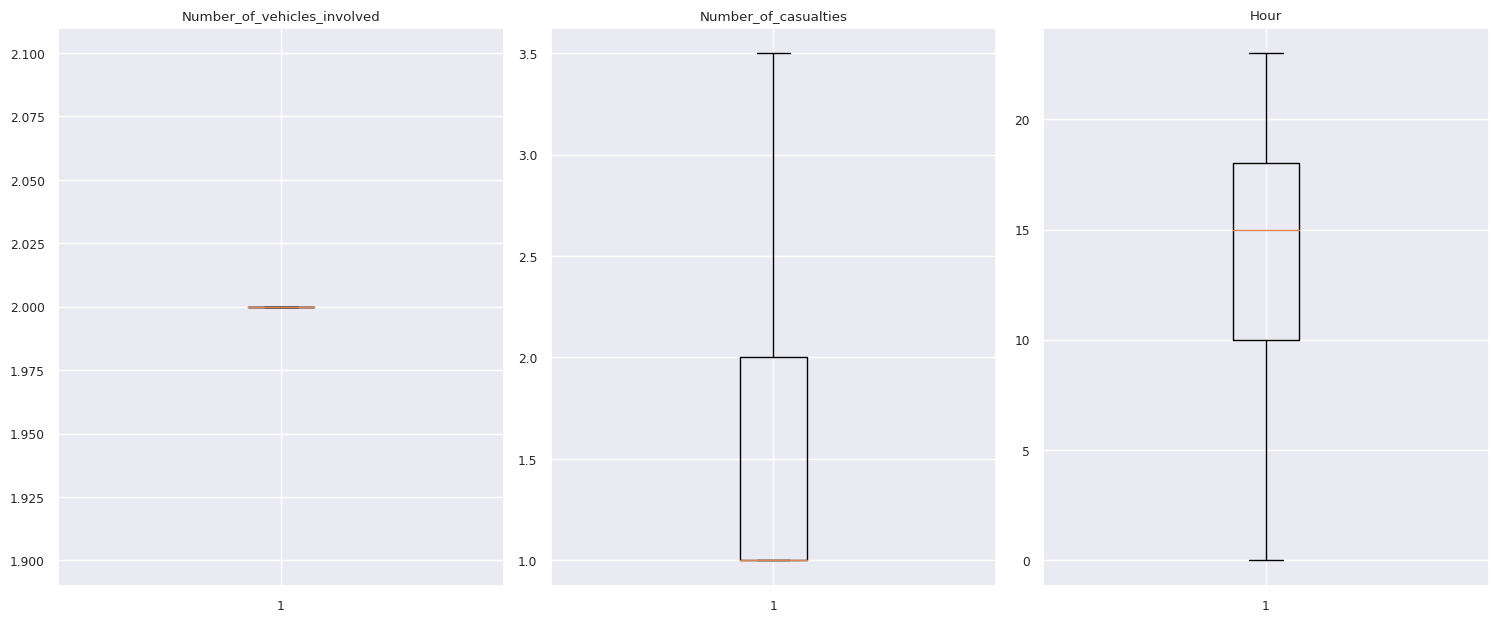

In [ ]:
import matplotlib.pyplot as plt
numerical_col = ["Number_of_vehicles_involved", "Number_of_casualties", "Hour"]
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- Outliers are treated successfully.

In [ ]:
df1.Number_of_casualties

1        2.0
3        2.0
7        1.0
8        1.0
9        1.0
        ... 
12309    2.0
12312    1.0
12313    1.0
12314    1.0
12315    1.0
Name: Number_of_casualties, Length: 8439, dtype: float64

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8439 entries, 1 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Day_of_week                  8439 non-null   object 
 1   Age_band_of_driver           8439 non-null   object 
 2   Sex_of_driver                8439 non-null   object 
 3   Educational_level            8439 non-null   object 
 4   Vehicle_driver_relation      8439 non-null   object 
 5   Driving_experience           8439 non-null   object 
 6   Type_of_vehicle              8439 non-null   object 
 7   Owner_of_vehicle             8439 non-null   object 
 8   Service_year_of_vehicle      8439 non-null   object 
 9   Defect_of_vehicle            8439 non-null   object 
 10  Area_accident_occured        8439 non-null   object 
 11  Lanes_or_Medians             8439 non-null   object 
 12  Road_allignment              8439 non-null   object 
 13  Types_of_Junction

In [ ]:
df1['Accident_severity'].value_counts()

Slight Injury     7169
Serious Injury    1171
Fatal injury        99
Name: Accident_severity, dtype: int64

**Converting Target column from object to numerical column**

In [ ]:
df1['Accident_severity'] = df1['Accident_severity'].replace({'Slight Injury' : 0, 'Serious Injury' : 1, 'Fatal injury' : 2}).astype('int64')

In [ ]:
df1['Accident_severity'].value_counts()

0    7169
1    1171
2      99
Name: Accident_severity, dtype: int64

### Split Data

In [ ]:
X = df1.drop("Accident_severity", axis=1)  # Features
y = df1["Accident_severity"]  # Labels (Target Variable)

In [ ]:
y.value_counts(normalize=True)

0    0.849508
1    0.138761
2    0.011731
Name: Accident_severity, dtype: float64

In [ ]:
X.shape

(8439, 31)

In [ ]:
y.shape

(8439,)

## Encoding techniques - Encode categorical variables by creating dummy variables

In [ ]:
# define a function for encoding
def encode_cat_vars(x):
    x = pd.get_dummies(
        x, columns=x.select_dtypes(include=["object", "category"]).columns.tolist()
    )
    return x


# independent variables with encoded categorical variables
X_num = encode_cat_vars(X)
X_num.head()

,Number_of_vehicles_involved,Number_of_casualties,Hour,Day_of_week_Friday,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,...,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown
1,2,2.0,17,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2,2.0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2,1.0,17,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8,2,1.0,17,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2,1.0,17,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Modeling

In [ ]:
from sklearn.model_selection import train_test_split
# To build a decision tree model
from sklearn.tree import DecisionTreeClassifier

# To get different performance metrics
import sklearn.metrics as metrics
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    recall_score,
    accuracy_score,
    precision_score,
    f1_score,
)
# To undersample and oversample the data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import (accuracy_score,
                            classification_report,
                            recall_score, precision_score, f1_score,
                            confusion_matrix)
from mlxtend.evaluate import mcnemar_table, mcnemar_tables
from mlxtend.plotting import checkerboard_plot, plot_decision_regions
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
# from mlxtend.evaluate import bias_variance_decomp
from sklearn.decomposition import PCA
%matplotlib inline

**Spliting data into training and test set**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_num, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5907, 206) (2532, 206) (5907,) (2532,)


In [ ]:
# upsampling using smote

counter = Counter(y_train)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

counter = Counter(y_train)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

print("=============================")

print("Upsampled data shape: ", X_train.shape, y_train.shape)

Class= 0, n=5001 (84.66%)
Class= 1, n=835 (14.14%)
Class= 2, n=71 (1.20%)
Class= 0, n=5001 (33.33%)
Class= 1, n=5001 (33.33%)
Class= 2, n=5001 (33.33%)
Upsampled data shape:  (15003, 206) (15003,)


## Baseline Modelling

In [ ]:
def modelling(X_train, y_train, X_test, y_test, **kwargs):
    scores = {}
    models = []
    bvd = {}
    if 'xgb' in kwargs.keys() and kwargs['xgb']:
        xgb = XGBClassifier()
        xgb.fit(X_train._get_numeric_data(), np.ravel(y_train, order='C'))
        y_pred = xgb.predict(X_test._get_numeric_data())
        scores['xgb']= [accuracy_score(y_test, y_pred)]
        models.append(xgb)


    if 'rf' in kwargs.keys() and kwargs['rf']:
        rf = RandomForestClassifier(n_estimators=200)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        scores['rf']= [accuracy_score(y_test, y_pred)]
        models.append(rf)

    if 'extree' in kwargs.keys() and kwargs['extree']:
        extree = ExtraTreesClassifier()
        extree.fit(X_train, y_train)
        y_pred = extree.predict(X_test)
        scores['extree'] = [accuracy_score(y_test, y_pred)]
        models.append(extree)

    return scores,models

In [ ]:
scores,models = modelling(X_train,y_train, X_test, y_test, xgb=True, rf=True, extree=True)
print(scores)

{'xgb': [0.8479462875197472], 'rf': [0.8562401263823065], 'extree': [0.8538704581358609]}


**Accuracy Scores:**
- XGB = 84.79%
- Random Forest = 85.62%
- Extra Trees = 85.38%

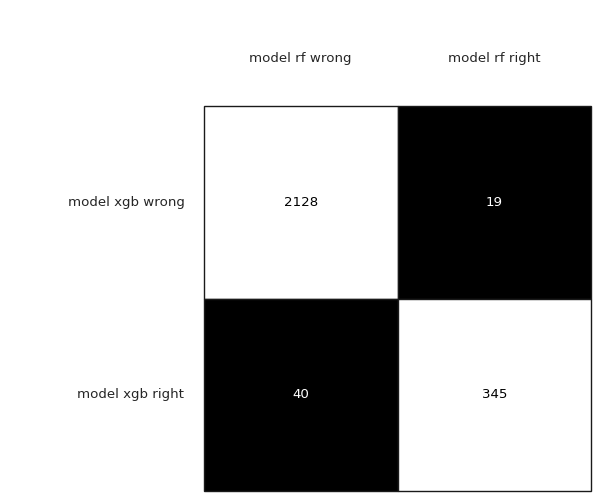

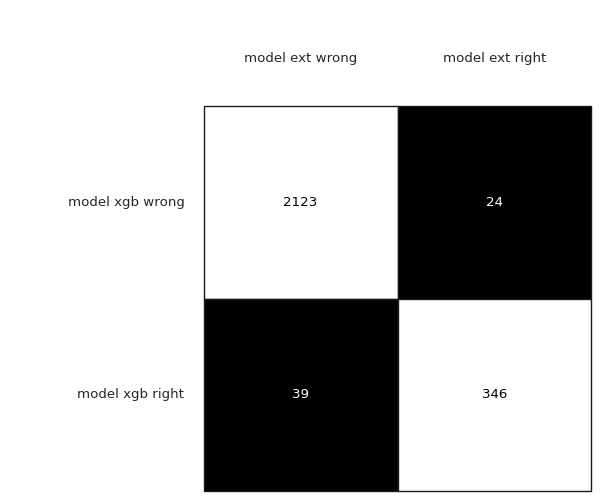

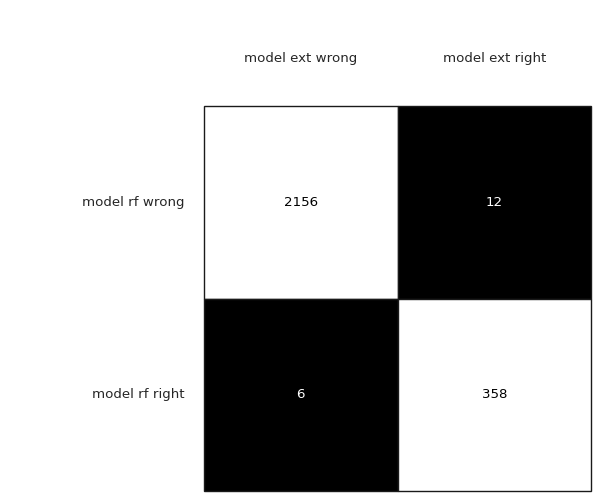

In [ ]:
y_pred_xgb = models[0].predict(X_test)
y_pred_rf = models[1].predict(X_test)
y_pred_ext = models[2].predict(X_test)


tb = mcnemar_tables(y_test,
                    y_pred_xgb,
                    y_pred_rf,
                    y_pred_ext)

brd = checkerboard_plot(tb['model_0 vs model_1'],
                        figsize=(5, 5),
                        fmt='%d',
                        col_labels=['model rf wrong', 'model rf right'],
                        row_labels=['model xgb wrong', 'model xgb right'])
plt.show()

brd = checkerboard_plot(tb['model_0 vs model_2'],
                        figsize=(5, 5),
                        fmt='%d',
                        col_labels=['model ext wrong', 'model ext right'],
                        row_labels=['model xgb wrong', 'model xgb right'])
plt.show()

brd = checkerboard_plot(tb['model_1 vs model_2'],
                        figsize=(5, 5),
                        fmt='%d',
                        col_labels=['model ext wrong', 'model ext right'],
                        row_labels=['model rf wrong', 'model rf right'])
plt.show()

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[2129   37    2]
 [ 318   18    0]
 [  28    0    0]]


In [ ]:
print('\nAccuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))


Accuracy: 0.85
Precision: 0.78
Recall: 0.85
F1-score: 0.80


**XG Boost model accuracy is 85% and F1-Score is 80%**

## Hyperparameter Tuning

In [ ]:
xgb.get_params()

{'objective': 'multi:softprob',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [200],  # Number of boosting rounds (trees)
    'max_depth': [3, 4],  # Maximum depth of each tree
    'min_child_weight': [1, 2],  # Minimum sum of instance weight (hessian) needed in a child
    'colsample_bytree': [0.8],  # Fraction of features used for training each tree
    'reg_alpha': [0.1],  # L1 regularization term on weights
    'reg_lambda': [0.1],  # L2 regularization term on weights
}

# Create the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_classes=3)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the model to the data (X_train, y_train)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_


Fitting 3 folds for each of 4 candidates, totalling 12 fits
[20:39:24] WARNING: ../src/learner.cc:767: 
Parameters: { "num_classes" } are not used.



In [ ]:
best_params

{'colsample_bytree': 0.8,
 'max_depth': 4,
 'min_child_weight': 2,
 'n_estimators': 200,
 'reg_alpha': 0.1,
 'reg_lambda': 0.1}

In [ ]:
xgb_tuned = XGBClassifier(best_params)
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
xgb_tuned.feature_importances_

array([0.        , 0.01541469, 0.00704199, 0.01599419, 0.01435163,
       0.00422799, 0.0064255 , 0.01186333, 0.01026575, 0.00903668,
       0.01047302, 0.01690181, 0.02057542, 0.01358152, 0.02236713,
       0.00680231, 0.00786203, 0.01873179, 0.0033305 , 0.0052735 ,
       0.00270956, 0.00053205, 0.00582307, 0.0038214 , 0.00386252,
       0.0046221 , 0.00195058, 0.00724227, 0.        , 0.01542879,
       0.01071421, 0.00798843, 0.01081467, 0.02443762, 0.01177289,
       0.00054892, 0.00806832, 0.00084589, 0.00047076, 0.0022823 ,
       0.00235888, 0.01196119, 0.00099992, 0.01001639, 0.00901421,
       0.01088534, 0.00262523, 0.00480968, 0.0011813 , 0.00077317,
       0.00712921, 0.00193798, 0.00060534, 0.00552593, 0.00465937,
       0.00036876, 0.00479124, 0.00504274, 0.00690145, 0.00563817,
       0.00724379, 0.00140775, 0.01375672, 0.        , 0.00071118,
       0.00234036, 0.00068109, 0.00729146, 0.00894677, 0.0023644 ,
       0.01071076, 0.0035503 , 0.00589027, 0.00640371, 0.     

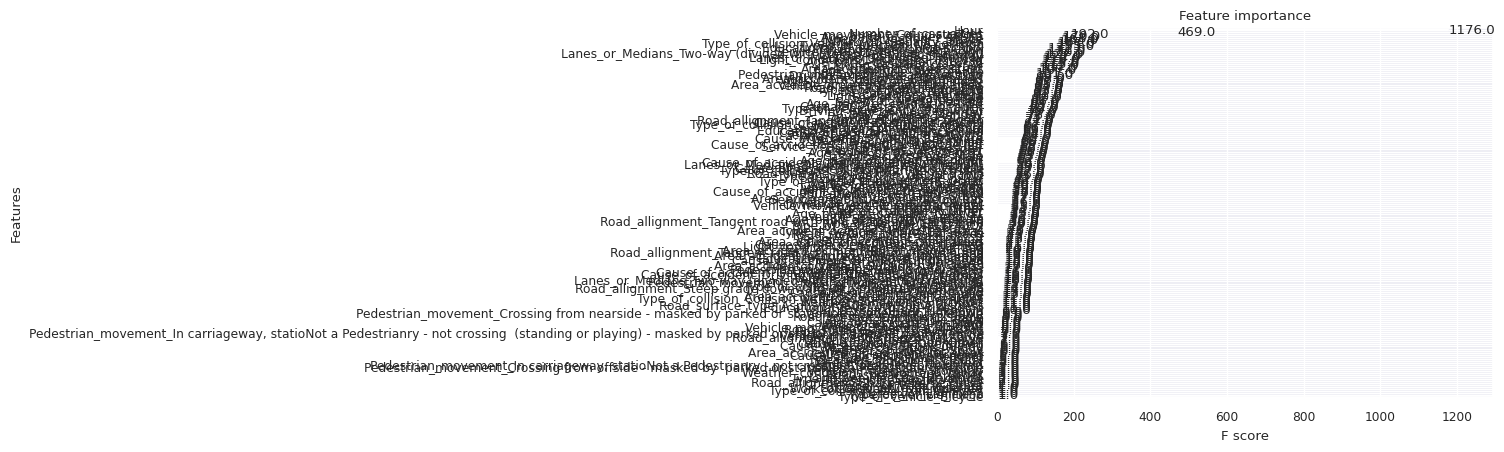

In [ ]:
xgb.plot_importance(xgb_tuned)
plt.show()

In [ ]:
X_train.columns.tolist()

['Number_of_vehicles_involved',
 'Number_of_casualties',
 'Hour',
 'Day_of_week_Friday',
 'Day_of_week_Monday',
 'Day_of_week_Saturday',
 'Day_of_week_Sunday',
 'Day_of_week_Thursday',
 'Day_of_week_Tuesday',
 'Day_of_week_Wednesday',
 'Age_band_of_driver_18-30',
 'Age_band_of_driver_31-50',
 'Age_band_of_driver_Over 51',
 'Age_band_of_driver_Under 18',
 'Age_band_of_driver_Unknown',
 'Sex_of_driver_Female',
 'Sex_of_driver_Male',
 'Sex_of_driver_Unknown',
 'Educational_level_Above high school',
 'Educational_level_Elementary school',
 'Educational_level_High school',
 'Educational_level_Illiterate',
 'Educational_level_Junior high school',
 'Educational_level_Unknown',
 'Educational_level_Writing & reading',
 'Vehicle_driver_relation_Employee',
 'Vehicle_driver_relation_Other',
 'Vehicle_driver_relation_Owner',
 'Vehicle_driver_relation_Unknown',
 'Driving_experience_1-2yr',
 'Driving_experience_2-5yr',
 'Driving_experience_5-10yr',
 'Driving_experience_Above 10yr',
 'Driving_experien

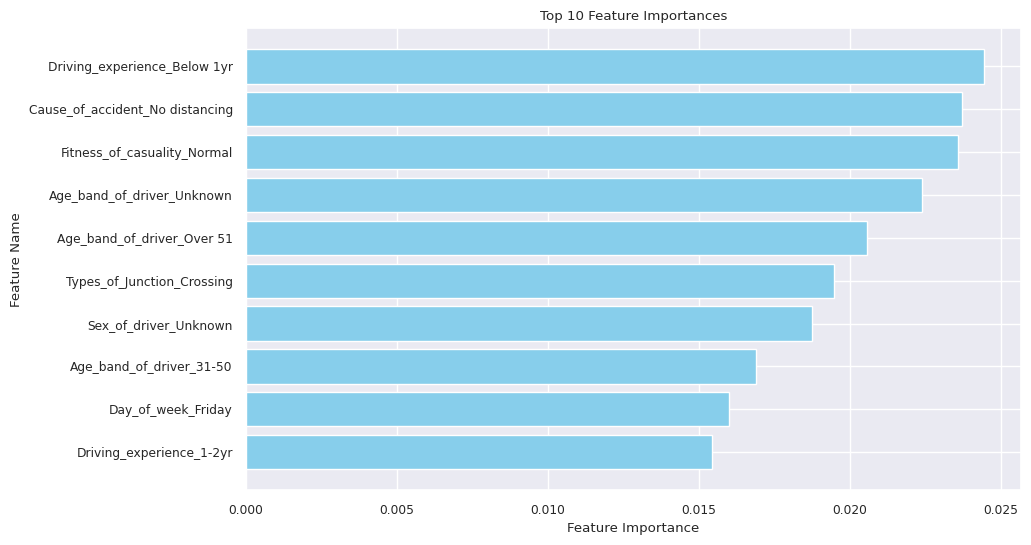

In [ ]:
# Get feature importances from the trained model
feature_importances = xgb_tuned.feature_importances_

# Get the names of the features (assuming you have them stored in a list)
# Replace 'feature_names' with your actual feature names
feature_names = X_train.columns.tolist()

# Create a DataFrame to store feature names and their importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Select the top 10 most important features
top_10_features = importance_df.head(10)

# Create a bar plot to visualize the top 10 feature importances
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important feature at the top
plt.show()

-**These are the top 10 features of our dataset**

In [ ]:
importance_df.head(10)

,Feature,Importance
33,Driving_experience_Below 1yr,0.024438
196,Cause_of_accident_No distancing,0.023703
174,Fitness_of_casuality_Normal,0.023558
14,Age_band_of_driver_Unknown,0.022367
12,Age_band_of_driver_Over 51,0.020575
95,Types_of_Junction_Crossing,0.019476
17,Sex_of_driver_Unknown,0.018732
11,Age_band_of_driver_31-50,0.016902
3,Day_of_week_Friday,0.015994
29,Driving_experience_1-2yr,0.015429


In [ ]:
y_pred = xgb_tuned.predict(X_test)

In [ ]:
print('\nAccuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

NameError: name 'accuracy_score' is not defined